<a href="https://colab.research.google.com/github/Vakhranev/MGIMO/blob/main/7%20%D1%84%D0%B5%D0%B2%D1%80%D0%B0%D0%BB%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Введение в анализ данных
**Анализ данных с использованием Python**

Язык программирования **Python** в последнее время все чаще используется для анализа данных, как в науке, так и коммерческой сфере.
В этой статье разберем простой пример исследования и классификации данных с использованием некоторых библиотек на **Python**. Для исследования, нам понадобится выбрать интересующий нас набор данных (**DataSet**). Разнообразные наборы Dataset'ы можно [скачать с сайта](https://www.kaggle.com/).

Для демонстрации возможностей исследуем простой набор данных с [информацией о наблюдениях НЛО](https://www.kaggle.com/NUFORC/ufo-sightings).

Итак, таблица с наблюдениями имеет следующие столбцы:


*   datetime — дата появления объекта
*   city — город в котором появился объект
*   state — штат
*   country — страна
*   duration (seconds) — время на которое появился объект в секундах
*   duration (hours/min) — время на которое появился объект в часах/минутах
*   shape — форма объекта
*   comments — коментарий
*   date posted — дата публикации
*   latitude — широта
*   longitude — долгота

Для начала нужно установить сам интерпретатор **Python3** с библиотеками. В Ubuntu-подобном дистрибутиве это будет:

In [ ]:
 sudo apt-get install python3
 sudo apt-get install python3-pip

**pip** — это система управления пакетами, которая используется для установки и управления программными пакетами, написанными на Python.  С её помощью устанавливаем библиотеки, которые будем использовать:


*   **sklearn** — библиотека, алгоритмов машинного обучения, она понадобится нам в дальнейшем для классификации исследуемых данных,

*   **matplotlib** — библиотека для построения графиков,

*   **pandas** — библиотека для обработки и анализа данных. Будем использовать для первичной обработки данных,

*   **numpy** — математическая библиотека с поддержкой многомерных массивов,

*   **translators** — библиотека для перевода текста,

*   **pycountry** — библиотека, которую будем использовать для преобразования кода страны в полное название страны,


Используя **pip** пакеты ставятся просто:

In [ ]:
!pip install translators
!pip install pycountry

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.1/70.1 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.7/122.7 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.3/144.3 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 648.0/648.0 kB 21.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.6/247.6 kB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 387.1/387.1 kB 21.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 28.3 MB/s eta 0:00:00
  Crea

Файл DataSet — **scrubbed.csv** должен лежать в рабочей директории, где создается файл программы.

Модуль подключается с помощью инструкции:

In [ ]:
 import <название модуля>

Если название модуля слишком длинное, и/или не нравится по соображениям удобства или политическим убеждениямм, то с помощью ключевого слова **as** для него можно создать псевдоним:

In [ ]:
 import <название модуля> as <псевдоним>

Тогда, чтобы обратиться к определенному атрибуту, который определен в модуле:

In [ ]:
<название модуля>.<Атрибут>

или:

In [ ]:
<псевдоним>.<Атрибут>

Для подключения определенных атрибутов модуля используется инструкция **from**. Для удобства, чтобы не писать названия модуля, при обращении к атрибуту, можно подключить нужный атрибут отдельно.

In [ ]:
 from <Название модуля> import <Атрибут>

Подключение нужных нам модулей:

In [ ]:
import pandas as pd
import numpy as np
import pycountry
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import translators as ts

Функция возвращает связный список с цветами.

In [ ]:
# Размер надписей на графиках
PLOT_LABEL_FONT_SIZE = 14
# Генерация цветовой схемы
# Возвращает список цветов
def getColors(n):
    COLORS = []
    cm = plt.cm.get_cmap('hsv', n)
    for i in np.arange(n):
        COLORS.append(cm(i))
    return COLORS

Для перевода некоторых названий с англиского на русский язык создадим функцию **translate**.

Функция принимает на вход аргумент **string** — строку, которую нужно перевести.

И возвращает переведенную на русский язык строку.

In [ ]:
def translate(string):
    t = ts.translate_text(string, translator='yandex', from_language='en', to_language='ru')
    return t

Напишем еще одну вспомогательную функцию для сортировки объектов **dict**.


**dict** — представляет собой встроенный тип Python, где данные хранятся в виде пары ключ-значения.

Эта функция будет полезна при построении гистограмм.

In [ ]:
def dict_sort(my_dict):
    keys = []
    values = []
    my_dict = sorted(my_dict.items(), key=lambda x:x[1], reverse=True)
    for k, v in my_dict:
        keys.append(k)
        values.append(v)
    return (keys,values)

Для чтения файла с таблицей  используем метод **read_csv** модуля **pd**. На вход функции подаем имя **csv**-файла, и чтобы подавить предупреждения при чтении файла, задаем параметры **escapechar** и **low_memory**.


*   **escapechar** — символы, которые следует игнорировать
*   **low_memory** — настройка обработки файла. Задаем **False** для считывание файла целиком, а не частями.

In [ ]:
df = pd.read_csv('./scrubbed.csv', escapechar='`', low_memory=False)

В некоторых полях таблицы есть поля со значением **None**. Этот встроенный тип, обозначающий неопределенность, поэтому некоторые алгоритмы анализа могут работать некорректно с этим значением, поэтому произведем замену **None** на строку **'unknown'** в полях таблицы. Эта процедура называется **импутацией**.

In [ ]:
df['shape'] = df['shape'].fillna('unknown')

Поменяем коды стран на названия на русском языке с помощью библиотек **pycountry** и **translators**.

In [ ]:
country_label_count = pd.value_counts(df['country'].values) # Получить из таблицы список всех меток country с их количеством
for label in list(country_label_count.keys()):
    c = pycountry.countries.get(alpha_2=str(label).upper())  # Получить объект страны
    if c is not None:  # Проверяем, найден ли объект
        t = translate(c.name)  # Переводим название страны
        df = df.replace({'country': str(label)}, t)
    else:
        print(f"Warning: Country code '{label}' not found in pycountry database")

<ipython-input-18-4eef9ad89eeb>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  country_label_count = pd.value_counts(df['country'].values) # Получить из таблицы список всех меток country с их количеством


In [ ]:
# Удаляем строки, где 'country' равно 'circle' или 'cigar'
df = df[~df['country'].isin(['circle', 'cigar'])]

Переведем все названия видов объектов на небе на русский язык.

In [ ]:
shapes_label_count = pd.value_counts(df['shape'].values)
for label in list(shapes_label_count.keys()):
    t = translate(str(label)) # Перевести название формы объекта на русский язык
    df = df.replace({'shape':str(label)}, t)

<ipython-input-20-0daf10354f96>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  shapes_label_count = pd.value_counts(df['shape'].values)


Для построения графиков используется библиотека **pyplot**. Примеры построения простого графика можно найти на официальном сайте https://matplotlib.org/users/pyplot_tutorial.html. Для построения гистограммы можно использовать метод **bar**.

<ipython-input-24-2748d2b14d4a>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  country_count = pd.value_counts(df['country'].values, sort=True)
<ipython-input-3-b9cce1dcf04d>:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cm = plt.cm.get_cmap('hsv', n)


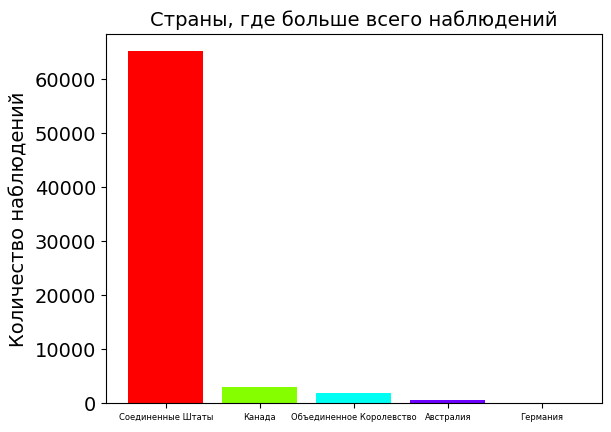

In [ ]:
country_count = pd.value_counts(df['country'].values, sort=True)
country_count_keys, country_count_values = dict_sort(dict(country_count))
TOP_COUNTRY = len(country_count_keys)
plt.title('Страны, где больше всего наблюдений', fontsize=PLOT_LABEL_FONT_SIZE)
plt.bar(np.arange(TOP_COUNTRY), country_count_values, color=getColors(TOP_COUNTRY))
plt.xticks(np.arange(TOP_COUNTRY), country_count_keys, rotation=0, fontsize=6)
plt.yticks(fontsize=PLOT_LABEL_FONT_SIZE)
plt.ylabel('Количество наблюдений', fontsize=PLOT_LABEL_FONT_SIZE)
plt.show()

Интересно еще посмотреть в какое время года наблюдали больше всего объектов.

<ipython-input-3-b9cce1dcf04d>:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cm = plt.cm.get_cmap('hsv', n)


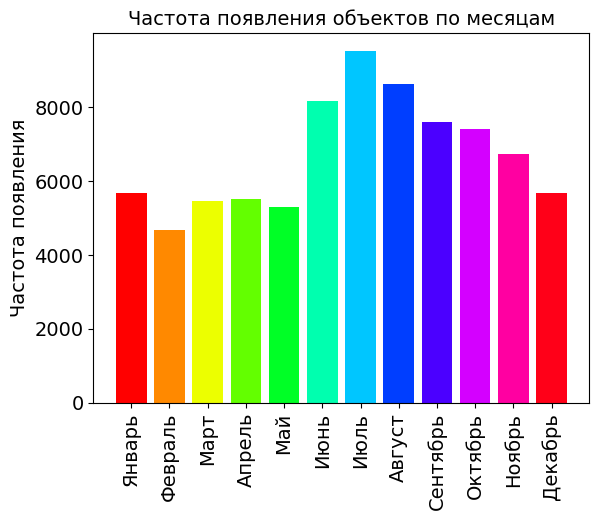

In [ ]:
MONTH_COUNT = [0,0,0,0,0,0,0,0,0,0,0,0]
MONTH_LABEL = ['Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь',
    'Июль', 'Август', 'Сентябрь' ,'Октябрь' ,'Ноябрь' ,'Декабрь']

for i in df['datetime']:
    m,d,y_t =  i.split('/')
    MONTH_COUNT[int(m)-1] = MONTH_COUNT[int(m)-1] + 1

plt.bar(np.arange(12), MONTH_COUNT, color=getColors(12))
plt.xticks(np.arange(12), MONTH_LABEL, rotation=90, fontsize=PLOT_LABEL_FONT_SIZE)
plt.ylabel('Частота появления', fontsize=PLOT_LABEL_FONT_SIZE)
plt.yticks(fontsize=PLOT_LABEL_FONT_SIZE)
plt.title('Частота появления объектов по месяцам', fontsize=PLOT_LABEL_FONT_SIZE)
plt.show()

Посмотрим какие формы объектов на небе видели и сколько раз.

<ipython-input-26-7a66fb05fc83>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  shapes_type_count = pd.value_counts(df['shape'].values)
<ipython-input-3-b9cce1dcf04d>:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cm = plt.cm.get_cmap('hsv', n)


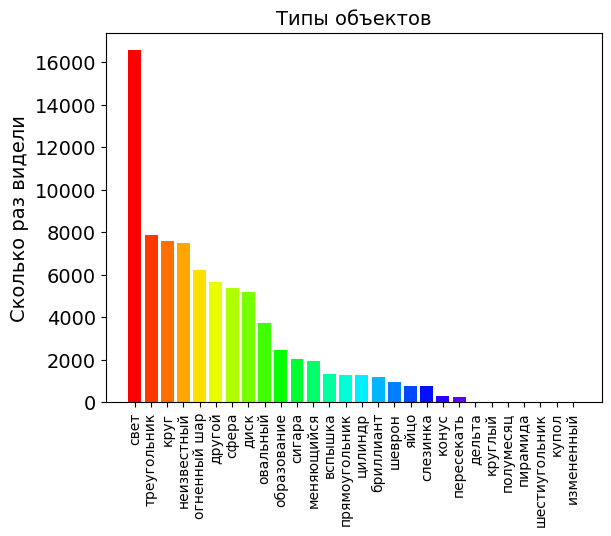

In [ ]:
shapes_type_count = pd.value_counts(df['shape'].values)
shapes_type_count_keys, shapes_type_count_values = dict_sort(dict(shapes_type_count))
OBJECT_COUNT = len(shapes_type_count_keys)
plt.title('Типы объектов', fontsize=PLOT_LABEL_FONT_SIZE)
bar = plt.bar(np.arange(OBJECT_COUNT), shapes_type_count_values, color=getColors(OBJECT_COUNT))
plt.xticks(np.arange(OBJECT_COUNT), shapes_type_count_keys, rotation=90, fontsize=10)
plt.yticks(fontsize=PLOT_LABEL_FONT_SIZE)
plt.ylabel('Сколько раз видели', fontsize=PLOT_LABEL_FONT_SIZE)
plt.show()

Подробнее см.: https://www.nkj.ru/archive/articles/19196/ (Наука и жизнь, Что светится на небе?)
Интересно еще посмотреть среднее время, на которое в небе появлялся каждый из объектов.

<ipython-input-3-b9cce1dcf04d>:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cm = plt.cm.get_cmap('hsv', n)


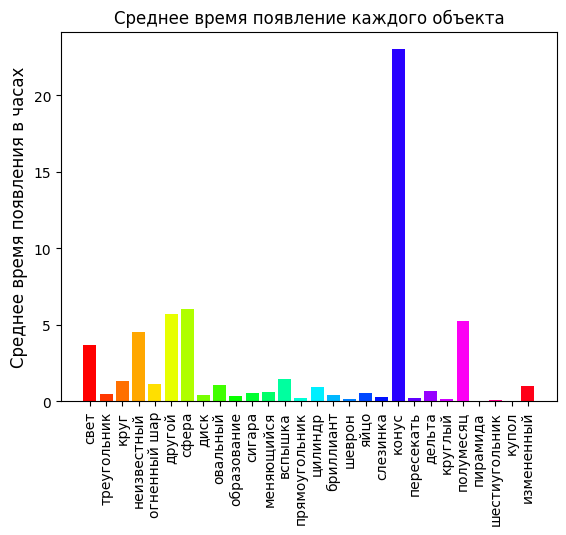

In [ ]:
shapes_durations_dict = {}
for i in shapes_type_count_keys:
    dfs = df[['duration (seconds)', 'shape']].loc[df['shape'] == i]
    # Convert 'duration (seconds)' to numeric, handling errors
    dfs['duration (seconds)'] = pd.to_numeric(dfs['duration (seconds)'], errors='coerce')
    shapes_durations_dict[i] = dfs['duration (seconds)'].mean(axis=0)/60.0/60.0

shapes_durations_dict_keys = []
shapes_durations_dict_values = []

for k in shapes_type_count_keys:
    shapes_durations_dict_keys.append(k)
    shapes_durations_dict_values.append(shapes_durations_dict[k])
plt.title('Среднее время появление каждого объекта', fontsize=12)
plt.bar(np.arange(OBJECT_COUNT), shapes_durations_dict_values, color=getColors(OBJECT_COUNT))
plt.xticks(np.arange(OBJECT_COUNT), shapes_durations_dict_keys, rotation=90, fontsize=10)
plt.ylabel('Среднее время появления в часах', fontsize=12)
plt.show()

Поэтому при больших отклонениях, считают не среднее значение, а **медиану**.


**Медиана** — это некоторое число, характеризующее выборку, одна половина в выборке меньше этого числа, другая больше. Для расчета медианы используем функцию **median**.


Заменим в коде выше:

In [ ]:
shapes_durations_dict[i] = dfs['duration (seconds)'].mean(axis=0)/60.0/60.0

на:

In [ ]:
shapes_durations_dict[i] = dfs['duration (seconds)'].median(axis=0)/60.0/60.0

<ipython-input-3-b9cce1dcf04d>:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cm = plt.cm.get_cmap('hsv', n)


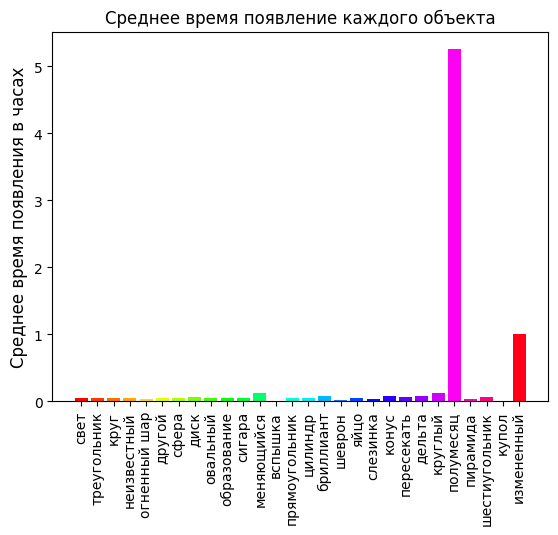

In [ ]:
shapes_durations_dict = {}
for i in shapes_type_count_keys:
    dfs = df[['duration (seconds)', 'shape']].loc[df['shape'] == i]
    # Convert 'duration (seconds)' to numeric, handling errors
    dfs['duration (seconds)'] = pd.to_numeric(dfs['duration (seconds)'], errors='coerce')
    shapes_durations_dict[i] = dfs['duration (seconds)'].median(axis=0)/60.0/60.0

shapes_durations_dict_keys = []
shapes_durations_dict_values = []

for k in shapes_type_count_keys:
    shapes_durations_dict_keys.append(k)
    shapes_durations_dict_values.append(shapes_durations_dict[k])
plt.title('Среднее время появление каждого объекта', fontsize=12)
plt.bar(np.arange(OBJECT_COUNT), shapes_durations_dict_values, color=getColors(OBJECT_COUNT))
plt.xticks(np.arange(OBJECT_COUNT), shapes_durations_dict_keys, rotation=90, fontsize=10)
plt.ylabel('Среднее время появления в часах', fontsize=12)
plt.show()

**Python-пакеты для Data Science**

Речь пойдёт о следующих пакетах:

1. NumPy
2. SciPy
3. Pandas
4. StatsModels
5. Matplotlib
6. Seaborn
7. Plotly
8. Bokeh
9. Scikit-Learn
10. Keras

Особенности NumPy:

*   Пакет можно использовать как для выполнения простых, так и достаточно сложных научных расчётов.
*   Он поддерживает многомерные массивы, расширяя возможности Python.
*   В пакете имеется множество встроенных методов, которые можно применять для выполнения различных вычислений на многомерных массивах.
*   Пакет позволяет выполнять различные преобразования данных.
*   Пакет поддерживает работу не только с числовыми, но и с другими типами данных.

Особенности SciPy:

*   Пакет SciPy основан на NumPy.
*   Он поддерживает вычисления, основанные на эффективных структурах данных NumPy.
*   Этот пакет, помимо возможностей NumPy, задействует и возможности других пакетов.
*   SciPy представляет собой набор подпакетов, в которых реализованы различные вычислительные механизмы. Среди них, например, подпакеты, реализующие быстрое преобразование Фурье, обработку изображений, решение дифференциальных уравнений, механизмы линейной алгебры.

Особенности Pandas:

*   Он поддерживает объект DataFrame, предназначенный для работы с индексированными массивами.
*   Этот пакет является одним из лучших инструментов для исследования данных.
*   Его можно использовать для работы с большими наборами данных. В частности, речь идёт о слиянии и объединении наборов данных, о создании срезов данных, о группировке данных, об их визуализации.
*   Пакет может работать с различными источниками данных. Например — с CSV- и TSV-файлами, с базами данных.

Особенности StatsModels:

*   Многие дата-сайентисты используют этот пакет для проведения статистических вычислений.
*   В его состав входят некоторые методы, которые знакомы тем, кто пользуется языком R.
*   С его помощью создают и исследуют, например, обобщённые линейные модели, он позволяет проводить одномерный и двумерный анализ данных, применяется для проверки гипотез.

Особенности Matplotlib:

*   С помощью этого пакета можно очень просто и удобно строить различные графики и диаграммы.
*   Графические представления данных, создаваемые этим пакетом, поддаются глубокой настройке.
*   Он поддерживает объектно-ориентированный API, позволяющий интегрировать его в различные приложения.

Особенности Seaborn:

*   Встроенные возможности исследования данных.
*   Поддержка различных форматов данных.
*   Он умеет строить графики моделей линейной регрессии.
*   Его используют для создания сложных визуализаций.
*   Он поддерживает различные способы настройки внешнего вида графиков.

Особенности Plotly:

*   Этот пакет поддерживает все необходимые дата-сайентисту виды графиков. Среди них — линейные диаграммы, круговые диаграммы, пузырьковые диаграммы, точечные диаграммы, древовидные диаграммы.
*   Он, кроме того, поддерживает специфические виды диаграмм, используемые в статистике и науке.
*   Пакет поддерживает трёхмерные визуализации.
*   Он экспортирует данные в формат JSON, подходящий для использования в других приложениях.

Особенности Bokeh:

*   Поддерживает визуализацию наборов данных, которые обычно используются в статистике и науке.
*   Поддерживает различные форматы выходных данных.
*   Существуют версии Bokeh для разных языков программирования.
*   Пакет хорошо интегрируется с такими Python-фреймворками, как Django и Flask.

Особенности Scikit-Learn:

*   На основе этого пакета можно создавать спам-детекторы и системы классификации изображений.
*   Поддерживает различные алгоритмы регрессии.
*   Позволяет создавать модели машинного обучения с учителем и без учителя.
*   Поддерживает механизмы кросс-валидации для оценки моделей.

Особенности Keras:

*   Поддерживает широкий набор нейросетевых моделей.
*   Содержит встроенные средства для работы с изображениями.
*   Поддерживает популярные алгоритмы глубокого обучения.
*   Отличается высоким уровнем расширяемости, что позволяет, при необходимости, оснащать его новым функционалом.

**Работа с базами данных в Python: основные библиотеки и примеры**

Рассмотрим наиболее популярные из библиотек:

*   **SQLite**: встроенная библиотека для работы с легковесными базами данных. Она не требует установки дополнительных программ и отлично подходит для небольших проектов и тестирования.
*   **MySQL Connector/Python**: официальная библиотека для работы с MySQL. Она обеспечивает надежное и эффективное взаимодействие с базами данных MySQL и поддерживает все основные функции MySQL.
*   **psycopg2**: популярная библиотека для работы с PostgreSQL. Она предоставляет полный набор функций для взаимодействия с PostgreSQL и поддерживает асинхронные операции.
*   **SQLAlchemy**: мощный ORM (Object-Relational Mapping) инструмент, который поддерживает различные базы данных. Он позволяет работать с базами данных на более высоком уровне абстракции, что упрощает разработку и поддержку кода.

Для начала работы с SQLite необходимо импортировать библиотеку `sqlite3` и создать подключение к базе данных.

In [ ]:
import sqlite3

# Подключение к базе данных (если базы данных не существует, она будет создана)
conn = sqlite3.connect('example.db')

# Создание курсора для выполнения SQL-запросов
cursor = conn.cursor()

В данном примере мы создадим таблицу `users` с полями `id`, `name` и `age`.

In [ ]:
# Создание таблицы users
cursor.execute('''
CREATE TABLE users (
    id INTEGER PRIMARY KEY,
    name TEXT NOT NULL,
    age INTEGER NOT NULL
)
''')

В данном примере мы вставим одну запись с именем `Alice` и возрастом `30`.

In [ ]:
# Вставка данных в таблицу
cursor.execute('''
INSERT INTO users (name, age) VALUES (?, ?)
''', ('Alice', 30))

# Сохранение изменений
conn.commit()

Для извлечения данных из таблицы используем метод `execute` и передаем SQL-запрос. В данном примере мы извлечем все записи из таблицы `users`.

In [ ]:
# Извлечение данных из таблицы
cursor.execute('SELECT * FROM users')
rows = cursor.fetchall()

for row in rows:
    print(row)

(1, 'Alice', 30)


После завершения работы с базой данных необходимо закрыть соединение.

In [ ]:
# Закрытие соединения с базой данных
conn.close()

Для подключения к базе данных MySQL используем библиотеку `mysql.connector`. Необходимо указать параметры подключения, такие как хост, имя пользователя, пароль и имя базы данных.

Начнем с установки необходимых пакетов:

In [ ]:
!pip install mysql-connector-python

Хотя в Google Colab MySQL не предустановлен, мы можем настроить его с помощью нескольких команд:

In [ ]:
!apt-get -y install mysql-server

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
mysql-server is already the newest version (8.0.41-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.


Установив MySQL, запустим сервер:

In [ ]:
!service mysql start

 * Starting MySQL database server mysqld
   ...done.


В Colab мы выполним необходимые команды напрямую:

In [ ]:
!mysql -e "ALTER USER 'root'@'localhost' IDENTIFIED WITH 'mysql_native_password' BY 'root';FLUSH PRIVILEGES;"

Давайте создадим подключение к нашему серверу MySQL с помощью Python:

In [ ]:
import mysql.connector

# Создайте подключение к серверу MySQL, указав плагин аутентификации
conn = mysql.connector.connect(
    user='root',
    password='root',
    host='localhost',
    auth_plugin='mysql_native_password'  # Принудительное использование mysql_native_password
)

# Создать курсор для взаимодействия с сервером MySQL
cursor = conn.cursor()

Для этого руководства давайте создадим базу данных с именем `library` и спроектируем в ней таблицу `books`:

In [ ]:
# Создайте новую базу данных с именем 'library'
cursor.execute("CREATE DATABASE IF NOT EXISTS library")

# Переключиться на базу данных 'library'
cursor.execute("USE library")

# Создайте таблицу 'books'
cursor.execute('''
CREATE TABLE IF NOT EXISTS books (
    id INT AUTO_INCREMENT PRIMARY KEY,
    title VARCHAR(255) NOT NULL,
    author VARCHAR(255) NOT NULL,
    year_published INT
)
''')

# Всегда помните, что после завершения работы необходимо закрыть курсор и соединение
cursor.close()
conn.close()

Когда наша таблица готова, давайте разместим в ней несколько книг:

In [ ]:
# Подключитесь к серверу MySQL и базе данных 'library'
conn = mysql.connector.connect(user='root', password='root', host='localhost', database='library')
cursor = conn.cursor()

books_data = [
    ("To Kill a Mockingbird", "Harper Lee", 1960),
    ("1984", "George Orwell", 1949),
    ("The Great Gatsby", "F. Scott Fitzgerald", 1925)
]

# Вставьте данные с помощью курсора
cursor.executemany('''
INSERT INTO books (title, author, year_published) VALUES (%s, %s, %s)
''', books_data)

# Зафиксируйте изменения
conn.commit()

# Закрыть курсор и соединение
cursor.close()
conn.close()

Получить все книги:

In [ ]:
# Подключитесь к серверу MySQL и базе данных 'library'
conn = mysql.connector.connect(user='root', password='root', host='localhost', database='library')
cursor = conn.cursor()

# Выполнить запрос SELECT
cursor.execute("SELECT * FROM books")

# Получить все результаты
records = cursor.fetchall()

# Напечатать записи
for record in records:
    print(record)

# Закрыть курсор и соединение
cursor.close()
conn.close()

(1, 'To Kill a Mockingbird', 'Harper Lee', 1960)
(2, '1984', 'George Orwell', 1949)
(3, 'The Great Gatsby', 'F. Scott Fitzgerald', 1925)


В этой части ноутбука я хотел бы рассказать, как можно установить базу данных postgres на свой блокнот Google Colab и приступить к обучению или проверке концепции postgres.

In [ ]:
# Install postgresql server
!sudo apt-get -y -qq update
!sudo apt-get -y -qq install postgresql
!sudo service postgresql start
# Setup a password `postgres` for username `postgres`
!sudo -u postgres psql -U postgres -c "ALTER USER postgres PASSWORD 'postgres';"
# Setup a database with name `sampledb` to be used
!sudo -u postgres psql -U postgres -c 'DROP DATABASE IF EXISTS sampledb;'
!sudo -u postgres psql -U postgres -c 'CREATE DATABASE sampledb;'

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
 * Starting PostgreSQL 14 database server
   ...done.
ALTER ROLE
DROP DATABASE
CREATE DATABASE


Для подключения к базе данных PostgreSQL используем библиотеку `psycopg2`. Необходимо указать параметры подключения, такие как хост, имя пользователя, пароль и имя базы данных.

In [ ]:
import psycopg2

# Подключение к базе данных PostgreSQL
conn = psycopg2.connect(
    host='localhost',
    user='postgres',
    password='postgres',
    dbname='sampledb'
)

# Создание курсора для выполнения SQL-запросов
cursor = conn.cursor()

В данном примере мы снова создадим таблицу `users` с полями `id`, `name` и `age`.

In [ ]:
# Создание таблицы users (исправленная версия)
cursor.execute('''
CREATE TABLE IF NOT EXISTS users (
    id SERIAL PRIMARY KEY, -- SERIAL автоматически создаёт уникальный ID
    name TEXT NOT NULL,
    age INTEGER NOT NULL
)
''')

Для вставки данных в таблицу используем метод `execute` и передаем SQL-запрос. В данном примере мы вставим одну запись с именем `Bob` и возрастом `25`.

In [ ]:
cursor.execute('''
INSERT INTO users (name, age) VALUES (%s, %s)
''', ('Bob', 25))  # id теперь генерируется автоматически

Для извлечения данных из таблицы используем метод `execute` и передаем SQL-запрос. В данном примере мы извлечем все записи из таблицы `users`.

In [ ]:
# Извлечение данных из таблицы
cursor.execute('SELECT * FROM users')
rows = cursor.fetchall()

for row in rows:
    print(row)

(1, 'Bob', 25)


После завершения работы с базой данных необходимо закрыть соединение.

In [ ]:
# Закрытие соединения с базой данных
conn.close()

**Упражнение 1: Создание базы данных и таблицы**

1.   Создайте базу данных SQLite с именем test.db.
1.   Создайте таблицу products с полями id, name и price.
1.   Вставьте несколько записей в таблицу products.

**Упражнение 2: Извлечение и обновление данных**

1.   Извлеките все записи из таблицы products.
1.   Обновите цену одного из продуктов.
1.   Удалите запись из таблицы products.

**Упражнение 3: Работа с MySQL и PostgreSQL**

1.   Подключитесь к базе данных MySQL и создайте таблицу orders с полями id, product_id и quantity.
1.   Вставьте несколько записей в таблицу orders.
1.   Подключитесь к базе данных PostgreSQL и выполните аналогичные операции.

**Основные функции библиотеки Pandas**

Так как возможность быстро находить описания функций позволяет программистам продуктивно работать, не теряя состояния потока, я перенёс сюда шпаргалку по `pandas`, в которую включено то, чем программисты пользуются каждый день, создавая веб-приложения и модели машинного обучения.

Нельзя сказать, что это — исчерпывающий список возможностей `pandas`, но сюда входят функции, которыми пользуются чаще всего, примеры и пояснения по поводу ситуаций, в которых эти функции особенно полезны.

Если вы хотите самостоятельно опробовать то, о чём тут пойдёт речь, загрузите набор данных [Anime Recommendations Database](https://www.kaggle.com/CooperUnion/anime-recommendations-database) с Kaggle.

Теперь выполните следующие команды.

In [12]:
import pandas as pd
import numpy as np
anime = pd.read_csv('anime.csv')
rating = pd.read_csv('rating.csv')
anime_modified = anime.set_index('name')

Иногда при загрузке данных формата CSV нужно указывать их кодировку (например, это может выглядеть как `encoding='ISO-8859–1'`). Это — первое, что стоит попробовать сделать в том случае, если оказывается, что после загрузки данных датафрейм содержит нечитаемые символы.

In [13]:
anime = pd.read_csv('anime.csv')

In [14]:
anime

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


Существует похожая функция для загрузки данных из Excel-файлов — `pd.read_excel`.

Создание датафрейма из данных, введённых вручную, может пригодиться, например, если нужно оценить изменения, претерпеваемые данными, проходящими через конвейер обработки данных.

In [15]:
df = pd.DataFrame([[1,'Bob', 'Builder'],
                  [2,'Sally', 'Baker'],
                  [3,'Scott', 'Candle Stick Maker']],
columns=['id','name', 'occupation'])

In [16]:
df

,id,name,occupation
0,1,Bob,Builder
1,2,Sally,Baker
2,3,Scott,Candle Stick Maker


Если датафреймы нужно копировать, то рекомендуется делать это сразу после их загрузки.

In [17]:
anime_copy = anime.copy(deep=True)

In [18]:
anime_copy

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


Ниже показан пример сохранения первых 10 строк датафрейма, но то, что именно сохранять, зависит от конкретной задачи.

In [19]:
rating[:10].to_csv('saved_ratings.csv', index=False)

Экспортировать данные в виде Excel-файлов можно с помощью функции `df.to_excel`.

Далее поговорим о выводе первых `n` элементов датафрейма. Похожую роль играет и вывод нескольких последних элементов.

In [23]:
anime.head(3)

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262


In [24]:
rating.tail(1)

,user_id,anime_id,rating
7813736,73516,8074,9


Функция `len()`, которую я тут покажу, не входит в состав `pandas`. Результаты её работы можно сохранить в переменной и воспользоваться ими там, где они нужны.

In [25]:
len(df)
#=> 3

3

Для подсчёта количества уникальных значений в столбце можно воспользоваться такой конструкцией:

In [27]:
len(rating['user_id'].unique())

73515

В сведения о датафрейме входит общая информация о нём вроде заголовка, количества значений, типов данных столбцов.

In [28]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


Есть ещё одна функция, похожая на `df.info` — `df.dtypes`.

Знание среднего, минимального и максимального значений столбца `rating` даёт нам некоторое понимание того, как, в целом, выглядит датафрейм. Вот соответствующая команда:

In [29]:
anime.describe()

,anime_id,rating,members
count,12294.000000,12064.000000,1.229400e+04
mean,14058.221653,6.473902,1.807134e+04
std,11455.294701,1.026746,5.482068e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.250000,5.880000,2.250000e+02
50%,10260.500000,6.570000,1.550000e+03
75%,24794.500000,7.180000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06


Для того чтобы подсчитать количество значений в конкретном столбце, можно воспользоваться следующей конструкцией:

In [30]:
anime.type.value_counts()

,count
type,
TV,3787
OVA,3311
Movie,2348
Special,1676
ONA,659
Music,488


Создание списка или объекта Series на основе значений столбца может пригодиться в тех случаях, когда требуется извлекать значения столбцов в переменные `x` и `y` для обучения модели. Здесь применимы следующие команды:

In [32]:
anime['genre'].tolist()

['Drama, Romance, School, Supernatural',
 'Action, Adventure, Drama, Fantasy, Magic, Military, Shounen',
 'Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen',
 'Sci-Fi, Thriller',
 'Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen',
 'Comedy, Drama, School, Shounen, Sports',
 'Action, Adventure, Shounen, Super Power',
 'Drama, Military, Sci-Fi, Space',
 'Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen',
 'Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen',
 'Drama, Fantasy, Romance, Slice of Life, Supernatural',
 'Drama, School, Shounen',
 'Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen',
 'Action, Drama, Mecha, Military, Sci-Fi, Super Power',
 'Comedy, Drama, School, Shounen, Sports',
 'Adventure, Drama, Supernatural',
 'Drama, Music, Romance, School, Shounen',
 'Adventure, Fantasy, Historical, Mystery, Seinen, Slice of Life, Supernatural',
 'Fantasy, Slice of Life',
 'Action, Mecha, Military, School, Sci-Fi, Super Power',
 

In [33]:
anime['genre']

,genre
0,"Drama, Romance, School, Supernatural"
1,"Action, Adventure, Drama, Fantasy, Magic, Mili..."
2,"Action, Comedy, Historical, Parody, Samurai, S..."
3,"Sci-Fi, Thriller"
4,"Action, Comedy, Historical, Parody, Samurai, S..."
...,...
12289,Hentai
12290,Hentai
12291,Hentai
12292,Hentai


Обратите внимание на то, что я здесь использовал датафрейм `anime_modified`, так как его индексные значения выглядят интереснее.

In [34]:
anime_modified.index.tolist()

['Kimi no Na wa.',
 'Fullmetal Alchemist: Brotherhood',
 'Gintama°',
 'Steins;Gate',
 'Gintama&#039;',
 'Haikyuu!!: Karasuno Koukou VS Shiratorizawa Gakuen Koukou',
 'Hunter x Hunter (2011)',
 'Ginga Eiyuu Densetsu',
 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare',
 'Gintama&#039;: Enchousen',
 'Clannad: After Story',
 'Koe no Katachi',
 'Gintama',
 'Code Geass: Hangyaku no Lelouch R2',
 'Haikyuu!! Second Season',
 'Sen to Chihiro no Kamikakushi',
 'Shigatsu wa Kimi no Uso',
 'Mushishi Zoku Shou 2nd Season',
 'Ookami Kodomo no Ame to Yuki',
 'Code Geass: Hangyaku no Lelouch',
 'Hajime no Ippo',
 'Rurouni Kenshin: Meiji Kenkaku Romantan - Tsuioku-hen',
 'Cowboy Bebop',
 'One Punch Man',
 'Mononoke Hime',
 'Suzumiya Haruhi no Shoushitsu',
 'Monogatari Series: Second Season',
 'Mushishi Zoku Shou',
 'Mushishi',
 'Tengen Toppa Gurren Lagann',
 'Great Teacher Onizuka',
 'Natsume Yuujinchou Go',
 'Hajime no Ippo: New Challenger',
 'Mushishi Zoku Shou: Suzu no Shizuku',
 'Natsume Yuuji

Вот команда, которая позволяет получить список значений столбцов:

In [35]:
anime.columns.tolist()

['anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members']

Для того, чтобы пометить тестовый и обучающий наборы в двух разных датафреймах так, чтобы потом их можно было бы различить, используется такая конструкция:


In [36]:
anime['train set'] = True

Создание нового датафрейма из подмножества столбцов может пригодиться в том случае, если требуется сохранить в новом датафрейме несколько столбцов огромного датафрейма, но при этом не хочется выписывать имена столбцов, которые нужно удалить.

In [37]:
anime[['name','episodes']]

,name,episodes
0,Kimi no Na wa.,1
1,Fullmetal Alchemist: Brotherhood,64
2,Gintama°,51
3,Steins;Gate,24
4,Gintama&#039;,51
...,...,...
12289,Toushindai My Lover: Minami tai Mecha-Minami,1
12290,Under World,1
12291,Violence Gekiga David no Hoshi,4
12292,Violence Gekiga Shin David no Hoshi: Inma Dens...,1


Если удалять нужно много столбцов, то эта задача может оказаться довольно-таки утомительной, поэтому тут рекомендуется пользоваться возможностью, описанной в предыдущей ячейке.

In [38]:
anime.drop(['anime_id', 'genre', 'members'], axis=1).head()

,name,type,episodes,rating,train set
0,Kimi no Na wa.,Movie,1,9.37,True
1,Fullmetal Alchemist: Brotherhood,TV,64,9.26,True
2,Gintama°,TV,51,9.25,True
3,Steins;Gate,TV,24,9.17,True
4,Gintama&#039;,TV,51,9.16,True


Самое интересное в этом примере — это конструкция `df.sum(axis=0)`, которая позволяет получать суммы значений из различных строк.

In [40]:
df = pd.DataFrame([[1,'Bob', 8000],
                  [2,'Sally', 9000],
                  [3,'Scott', 20]], columns=['id','name', 'power level'])
# Use pd.concat instead of df.append
df = pd.concat([df, pd.DataFrame([df.sum(axis=0)], columns=df.columns)], ignore_index=True)

In [41]:
df

,id,name,power level
0,1,Bob,8000
1,2,Sally,9000
2,3,Scott,20
3,6,BobSallyScott,17020


Команда вида `df.sum(axis=1)` позволяет суммировать значения в столбцах.

Похожий механизм применим и для расчёта средних значений, например — `df.mean(axis=0)`.

В данном примере мы сначала разделяем датафрейм на две части, а потом снова объединяем эти части:

In [43]:
df1 = anime[0:2]
df1

,anime_id,name,genre,type,episodes,rating,members,train set
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,True
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,True


In [44]:
df2 = anime[2:4]
df2

,anime_id,name,genre,type,episodes,rating,members,train set
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,True
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,True


In [45]:
pd.concat([df1, df2], ignore_index=True)

,anime_id,name,genre,type,episodes,rating,members,train set
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,True
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,True
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,True
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,True


Функция `df.merge`, которую мы тут рассмотрим, похожа на левое соединение SQL. Она применяется тогда, когда два датафрейма нужно объединить по некоему столбцу.

In [47]:
rating.merge(anime, left_on='anime_id', right_on='anime_id', suffixes=('_left', '_right'))

,user_id,anime_id,rating_left,name,genre,type,episodes,rating_right,members,train set
0,1,20,-1,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297,True
1,1,24,-1,School Rumble,"Comedy, Romance, School, Shounen",TV,26,8.06,178553,True
2,1,79,-1,Shuffle!,"Comedy, Drama, Ecchi, Fantasy, Harem, Magic, R...",TV,24,7.31,158772,True
3,1,226,-1,Elfen Lied,"Action, Drama, Horror, Psychological, Romance,...",TV,13,7.85,623511,True
4,1,241,-1,Girls Bravo: First Season,"Comedy, Ecchi, Fantasy, Harem, Romance, School",TV,11,6.69,84395,True
...,...,...,...,...,...,...,...,...,...,...
7813722,73515,16512,7,Devil Survivor 2 The Animation,"Action, Demons, Supernatural",TV,13,7.06,101266,True
7813723,73515,17187,9,Ghost in the Shell: Arise - Border:1 Ghost Pain,"Mecha, Police, Psychological, Sci-Fi",Movie,1,7.64,31747,True
7813724,73515,22145,10,Kuroshitsuji: Book of Circus,"Comedy, Demons, Fantasy, Historical, Shounen, ...",TV,10,8.37,122895,True
7813725,73516,790,9,Ergo Proxy,"Mystery, Psychological, Sci-Fi",TV,23,8.03,265005,True


Индексными значениями датафрейма `anime_modified` являются названия аниме. Обратите внимание на то, как мы используем эти названия для выбора конкретных столбцов.

In [48]:
anime_modified.loc[['Haikyuu!! Second Season','Gintama']]

,anime_id,genre,type,episodes,rating,members
name,,,,,,
Haikyuu!! Second Season,28891,"Comedy, Drama, School, Shounen, Sports",TV,25,8.93,179342
Gintama,918,"Action, Comedy, Historical, Parody, Samurai, S...",TV,201,9.04,336376


При использовании функции `df.iloc` первой строке назначается индекс `0`, второй — индекс `1`, и так далее.

Следующая конструкция позволяет выбрать три первых строки датафрейма:

In [49]:
anime_modified.iloc[0:3]

,anime_id,genre,type,episodes,rating,members
name,,,,,,
Kimi no Na wa.,32281,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
Fullmetal Alchemist: Brotherhood,5114,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
Gintama°,28977,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262


Для получения строк датафрейма в ситуации, когда имеется список значений столбцов, можно воспользоваться следующей командой:

In [50]:
anime[anime['type'].isin(['TV', 'Movie'])]

,anime_id,name,genre,type,episodes,rating,members,train set
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,True
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,True
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,True
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,True
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,True
...,...,...,...,...,...,...,...,...
11738,3038,Senya Ichiya Monogatari,"Fantasy, Hentai",Movie,1,6.18,1394,True
11805,2755,Cleopatra,"Hentai, Historical",Movie,1,6.06,1709,True
12244,11141,Blue Seagull,"Action, Hentai",Movie,1,4.60,337,True
12258,20007,Hi Gekiga Ukiyoe Senya Ichiya,"Action, Hentai",Movie,1,1.92,129,True


Если нас интересует единственное значение — можно воспользоваться такой конструкцией:

In [52]:
anime[anime['type'] == 'TV']

,anime_id,name,genre,type,episodes,rating,members,train set
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,True
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,True
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,True
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,True
5,32935,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,"Comedy, Drama, School, Shounen, Sports",TV,10,9.15,93351,True
...,...,...,...,...,...,...,...,...
11104,34522,"Wake Up, Girls! Shin Shou","Drama, Music",TV,Unknown,NaN,381,True
11106,34467,Yami Shibai 4th Season,"Dementia, Horror, Supernatural",TV,Unknown,NaN,1838,True
11107,32615,Youjo Senki,"Magic, Military",TV,Unknown,NaN,6652,True
11110,34284,Yuuki Yuuna wa Yuusha de Aru: Washio Sumi no Shou,"Drama, Fantasy, Magic, Slice of Life",TV,6,NaN,2593,True


Когда мы говорим о получении среза датафрейма, речь идёт о получении фрагмента датафрейма, содержащего строки, соответствующие заданной конфигурации индексов.

In [53]:
anime[1:3]

,anime_id,name,genre,type,episodes,rating,members,train set
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,True
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,True


Обратите внимание на то, что при использовании этого метода сохраняются существующие индексные значения.

In [54]:
anime[anime['rating'] > 8]

,anime_id,name,genre,type,episodes,rating,members,train set
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,True
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,True
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,True
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,True
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,True
...,...,...,...,...,...,...,...,...
10765,32230,Xi You Ji,"Adventure, Fantasy",TV,52,8.07,89,True
10786,26313,Yakusoku: Africa Mizu to Midori,"Drama, Kids",OVA,1,9.25,53,True
10793,28557,Yamete! Writer Asobi: Doubutsu Mura no Shoubou...,"Drama, Kids",OVA,1,8.67,40,True
10847,26097,Yume no Tsuzuki,"Drama, Kids",OVA,1,8.67,53,True


Для сортировки датафреймов по значениям столбцов можно воспользоваться функцией `df.sort_values`:

In [55]:
anime.sort_values('rating', ascending=False)

,anime_id,name,genre,type,episodes,rating,members,train set
10464,33662,Taka no Tsume 8: Yoshida-kun no X-Files,"Comedy, Parody",Movie,1,10.00,13,True
10400,30120,Spoon-hime no Swing Kitchen,"Adventure, Kids",TV,Unknown,9.60,47,True
9595,23005,Mogura no Motoro,Slice of Life,Movie,1,9.50,62,True
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,True
9078,33607,Kahei no Umi,Historical,Movie,1,9.33,44,True
...,...,...,...,...,...,...,...,...
12274,34492,Nuki Doki! Tenshi to Akuma no Sakusei Battle -...,Hentai,OVA,Unknown,NaN,392,True
12279,34491,Sagurare Otome The Animation,Hentai,OVA,1,NaN,79,True
12280,34312,Saimin Class,Hentai,OVA,Unknown,NaN,240,True
12282,34388,Shikkoku no Shaga The Animation,Hentai,OVA,Unknown,NaN,195,True


Вот как подсчитать количество записей с различными значениями в столбцах:

In [56]:
anime.groupby('type').count()

,anime_id,name,genre,episodes,rating,members,train set
type,,,,,,,
Movie,2348,2348,2306,2348,2297,2348,2348
Music,488,488,488,488,488,488,488
ONA,659,659,655,659,652,659,659
OVA,3311,3311,3310,3311,3285,3311,3311
Special,1676,1676,1674,1676,1671,1676,1676
TV,3787,3787,3777,3787,3671,3787,3787


Обратите внимание на то, что здесь используется `reset_index()`. В противном случае столбец `type` становится индексным столбцом. В большинстве случаев рекомендуется делать то же самое.

In [57]:
anime.groupby(["type"]).agg({
  "rating": "sum",
  "episodes": "count",
  "name": "last"
}).reset_index()

,type,rating,episodes,name
0,Movie,14512.58,2348,Yasuji no Pornorama: Yacchimae!!
1,Music,2727.43,488,Yuu no Mahou
2,ONA,3679.43,659,Docchi mo Maid
3,OVA,20942.60,3311,Violence Gekiga Shin David no Hoshi: Inma Dens...
4,Special,10900.77,1676,Junjou Shoujo Et Cetera Specials
5,TV,25338.34,3787,Yuuki Yuuna wa Yuusha de Aru: Yuusha no Shou


Обратите внимание на то, что здесь серьёзно отфильтрован датафрейм, что ускорило создание сводной таблицы.

In [58]:
tmp_df = rating.copy()
tmp_df.sort_values('user_id', ascending=True, inplace=True)
tmp_df = tmp_df[tmp_df.user_id < 10]
tmp_df = tmp_df[tmp_df.anime_id < 30]
tmp_df = tmp_df[tmp_df.rating != -1]
pd.pivot_table(tmp_df, values='rating', index=['user_id'], columns=['anime_id'], aggfunc=np.sum, fill_value=0)

<ipython-input-58-9cf27c786bed>:6: FutureWarning: The provided callable <function sum at 0x7b80d27e8360> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pd.pivot_table(tmp_df, values='rating', index=['user_id'], columns=['anime_id'], aggfunc=np.sum, fill_value=0)


anime_id,6,15,17,18,20,22,24
user_id,,,,,,,
3,0,0,0,0,8,0,0
5,8,6,6,6,6,5,1
7,0,0,0,0,0,7,0


Здесь мы поговорим о записи значения `0` в ячейки, содержащие значение `NaN`. В этом примере мы создаём такую же сводную таблицу, как и ранее, но без использования `fill_value=0`. А затем используем функцию `fillna(0)` для замены значений `NaN` на `0`.

In [59]:
pivot = pd.pivot_table(tmp_df, values='rating', index=['user_id'], columns=['anime_id'], aggfunc=np.sum)
pivot.fillna(0)

<ipython-input-59-343635d0a72d>:1: FutureWarning: The provided callable <function sum at 0x7b80d27e8360> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot = pd.pivot_table(tmp_df, values='rating', index=['user_id'], columns=['anime_id'], aggfunc=np.sum)


anime_id,6,15,17,18,20,22,24
user_id,,,,,,,
3,0.0,0.0,0.0,0.0,8.0,0.0,0.0
5,8.0,6.0,6.0,6.0,6.0,5.0,1.0
7,0.0,0.0,0.0,0.0,0.0,7.0,0.0


Программисты используют функцию `df.sample` каждый раз, когда им нужно получить небольшой случайный набор строк из большого датафрейма. Если используется параметр `frac=1`, то функция позволяет получить аналог исходного датафрейма, строки которого будут перемешаны.

In [60]:
anime.sample(frac=0.25)

,anime_id,name,genre,type,episodes,rating,members,train set
7780,22417,Quantum Leap,"Action, Music",Music,1,5.02,184,True
5485,133,Green Green,"Comedy, Ecchi, Romance, School, Slice of Life",TV,12,6.44,80562,True
10050,29937,Qin Shiming Yue Zhi: Luosheng Tangxia,"Action, Fantasy, Historical, Martial Arts",ONA,1,6.05,131,True
6678,11763,Sekai de Ichiban Tsuyoku Naritai!,"Action, Ecchi, Sports",TV,12,6.00,26513,True
10760,31150,Xi Yang Yang Yu Hui Tai Lang,"Adventure, Comedy, Kids",TV,Unknown,5.87,72,True
...,...,...,...,...,...,...,...,...
6413,17871,Yonhyakunijuu Renpai Girl,"Comedy, Romance, School",Special,1,6.13,2852,True
3614,6055,F,"Cars, Shounen, Sports",TV,31,6.93,816,True
10653,10244,Ultra B: Black Hole kara no Dokusaisha BB!!,"Adventure, Comedy",Movie,1,5.54,71,True
4998,34475,Monster Strike: Rain of Memories,"Action, Fantasy, Game",ONA,1,6.58,313,True


Следующая конструкция позволяет перебирать строки датафрейма:

In [61]:
for idx,row in anime[:2].iterrows():
    print(idx, row)

0 anime_id                                    32281
name                               Kimi no Na wa.
genre        Drama, Romance, School, Supernatural
type                                        Movie
episodes                                        1
rating                                       9.37
members                                    200630
train set                                    True
Name: 0, dtype: object
1 anime_id                                                  5114
name                          Fullmetal Alchemist: Brotherhood
genre        Action, Adventure, Drama, Fantasy, Magic, Mili...
type                                                        TV
episodes                                                    64
rating                                                    9.26
members                                                 793665
train set                                                 True
Name: 1, dtype: object


Здесь я рассказал о некоторых полезных приёмах использования `pandas` в среде Jupyter Notebook.

# Описательный анализ данных

**Частотный анализ русского текста и облако слов**

Проведение частотного анализа можно условно разделить на несколько этапов:

1.   Загрузка и обзор данных
1.   Очистка и предварительная обработка текста
1.   Удаление стоп-слов
1.   Перевод слов в основную форму
1.   Подсчёт статистики встречаемости слов в тексте
1.   Визуализация популярности слов в виде облака

Исходный текст доступен по адресу [github.com/Metafiz/nlp-course-20/blob/master/pushkin-metel.txt](https://github.com/Metafiz/nlp-course-20/blob/master/pushkin-metel.txt)

Читаем всё содержимое файла, в результате получаем строку text:

In [1]:
f = open('pushkin-metel.txt', "r", encoding="utf-8")
text = f.read()

Длину текста – количество символов – можно получить стандартной функцией len:

In [2]:
len(text)

22968

Например, для просмотра первых 300 символов текста достаточно выполнить команду:


In [3]:
text[:300]

'Метель \n\n\nКони мчатся по буграм, \n\nТопчут снег глубокой \n\nВот, в сторонке божий храм \n\nВиден одинокой. \n\nВдруг метелица кругом; \n\nСнег валит клоками; \n\nЧерный вран, свистя крылом, \n\nВьется над санями; \n\nВещий стон гласит печаль! \n\nКони торопливы \n\nЧутко смотрят в темну даль, \n\nВоздымая гривы\n\n\xa0\xa0\xa0\xa0Жу'

Для начала переведём символы в единый регистр, например, нижний:

In [4]:
text = text.lower()

Используем стандартный набор символов пунктуации из модуля string:

In [5]:
import string
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


Добавим к знакам пунктуации символы переноса строки, табуляции и другие символы, которые встречаются в нашем исходном тексте (например, символ с кодом \xa0):

In [6]:
spec_chars = string.punctuation + '\n\xa0«»\t—…'

Для удаления символов используем поэлементную обработку строки – разделим исходную строку text на символы, оставим только символы, не входящие в набор spec_chars и снова объединим список символов в строку:

In [7]:
text = "".join([ch for ch in text if ch not in spec_chars])

Можно объявить простую функцию, которая удаляет указанный набор символов из исходного текста:

In [8]:
def remove_chars_from_text(text, chars):
    return "".join([ch for ch in text if ch not in chars])

Её можно использовать как для удаления спец.символов, так и для удаления цифр из исходного текста:

In [9]:
text = remove_chars_from_text(text, spec_chars)
text = remove_chars_from_text(text, string.digits)

Для разбиения текста на слова можно использовать готовый метод библиотеки NLTK:

In [11]:
import nltk
nltk.download('punkt_tab')
from nltk import word_tokenize
text_tokens = word_tokenize(text)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Для вычисления количества слов в предобработанном тексте можно получить длину списка токенов:

In [12]:
len(text_tokens)

3402

Для вывода первых 10 слов воспользуемся операцией среза:

In [13]:
text_tokens[:10]

['метель',
 'кони',
 'мчатся',
 'по',
 'буграм',
 'топчут',
 'снег',
 'глубокой',
 'вот',
 'в']

Для применения инструментов частотного анализа библиотеки NLTK необходимо список токенов преобразовать к классу Text, который входит в эту библиотеку:

In [14]:
text = nltk.Text(text_tokens)

Выведем тип переменной text:

In [15]:
print(type(text))

<class 'nltk.text.Text'>


Например, это действие выведет 10 первых токенов из текста:

In [16]:
text[:10]

['метель',
 'кони',
 'мчатся',
 'по',
 'буграм',
 'топчут',
 'снег',
 'глубокой',
 'вот',
 'в']

Для подсчёта статистики распределения частот слов в тексте применяется класс FreqDist (frequency distributions):

In [17]:
from nltk.probability import FreqDist
fdist = FreqDist(text)

Попытка вывести переменную fdist отобразит словарь, содержащий токены и их частоты – количество раз, которые эти слова встречаются в тексте:

In [18]:
fdist

FreqDist({'и': 146, 'в': 101, 'не': 69, 'что': 54, 'с': 44, 'он': 42, 'она': 39, 'ее': 39, 'на': 31, 'было': 27, ...})

Также можно воспользоваться методом most_common для получения списка кортежей с наиболее часто встречающимися токенами:

In [19]:
fdist.most_common(5)

[('и', 146), ('в', 101), ('не', 69), ('что', 54), ('с', 44)]

С параметром cumulative=False график иллюстрирует [закон Ципфа](https://ru.wikipedia.org/wiki/%D0%97%D0%B0%D0%BA%D0%BE%D0%BD_%D0%A6%D0%B8%D0%BF%D1%84%D0%B0): если все слова достаточно длинного текста упорядочить по убыванию частоты их использования, то частота n-го слова в таком списке окажется приблизительно обратно пропорциональной его порядковому номеру n.

<Axes: xlabel='Samples', ylabel='Counts'>

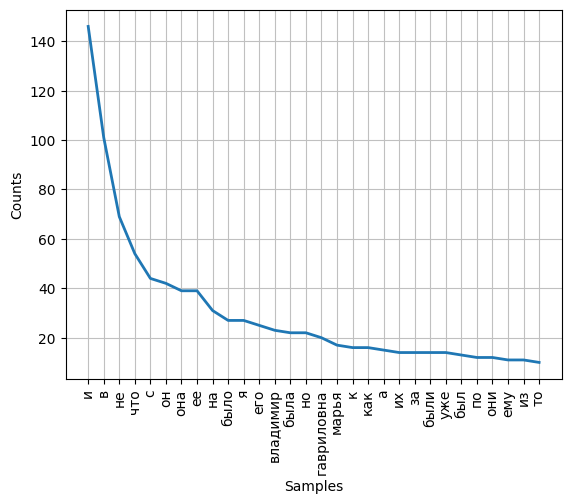

In [20]:
fdist.plot(30,cumulative=False)

Получим список стоп-слов для русского языка:

In [23]:
from nltk.corpus import stopwords
nltk.download('stopwords')
russian_stopwords = stopwords.words("russian")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Список стоп-слов может быть расширен с помощью стандартного метода extend:

In [24]:
russian_stopwords.extend(['это', 'нею'])

После удаления стоп-слов частота распределения токенов в тексте выглядит следующим образом:

In [28]:
fdist_sw = FreqDist([w for w in text if w not in russian_stopwords])
fdist_sw.most_common(10)

[('владимир', 23),
 ('гавриловна', 20),
 ('марья', 17),
 ('поехал', 9),
 ('бурмин', 9),
 ('поминутно', 8),
 ('метель', 7),
 ('несколько', 6),
 ('сани', 6),
 ('владимира', 6)]

Для визуализации результатов частотного анализа текста в виде «облака слов» нам потребуются библиотеки wordcloud и matplotlib:

In [29]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

Для преобразования списка токенов после предобработки и удаления стоп-слов воспользуемся методом join, указав в качестве разделителя пробел:

In [35]:
text_raw = " ".join(fdist_sw)

Выполним вызов метода построения облака:

In [36]:
wordcloud = WordCloud().generate(text_raw)

В результате получаем такое «облако слов» для нашего текста:

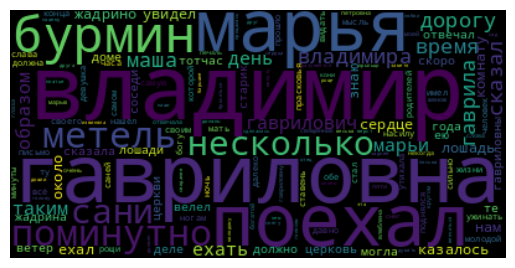

In [37]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Описательная статистика**

В этой части занятия мы поговорим об:

*   определении статистики;
*   описательной статистике: мерах центральной тенденции; мерах разброса.

Если вы не встречались с циклами `for` и списками, будет лучше сначала ознакомиться с ними.

Мы будем обсуждать статистику, используя реальные данные, взятые с платформы Kaggle из датасета [Wine Reviews](https://www.kaggle.com/datasets/zynicide/wine-reviews/data). Сами данные были извлечены с сайта [Wine Enthusiast](https://www.wineenthusiast.com/).

Код, представленный ниже, загружает датасет `wine-data.csv` в переменную `wines` в виде списка списков. В этой части занятия мы будем вести статистику на примере этой переменной:

In [49]:
import csv
with open("winemag-data_first150k.csv", "r", encoding="latin-1") as f:
    wines = list(csv.reader(f))

Давайте посмотрим на первые пять строк данных, указанных в таблице, чтобы понять, с какими значениями мы работаем:

In [50]:
import pandas as pd
wdf = pd.read_csv('winemag-data_first150k.csv')
wdf[:5]

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


Ключевые идеи:

*   статистика — наука о данных;
*   данные — набор наблюдений за интересующей нас генеральной совокупностью;
*   статистика предоставляет конкретный способ сравнения генеральных совокупностей с помощью чисел, а не неоднозначных описаний.

Давайте выясним, чему равна средняя оценка вина в нашем датасете:

In [52]:
# Извлекаем оценки из датасета
scores = [float(w[4]) for w in wines[1:]]

# Складываем все оценки
sum_score = sum(scores)

# Ищем количество оценок
num_score = len(scores)

# Считаем среднее значение
avg_score = sum_score/num_score

print(avg_score)  # выводит 87.8884184721394

87.8884184721394


Если количество значений чётное, то берётся среднее двух значений, которые «окружают» середину.

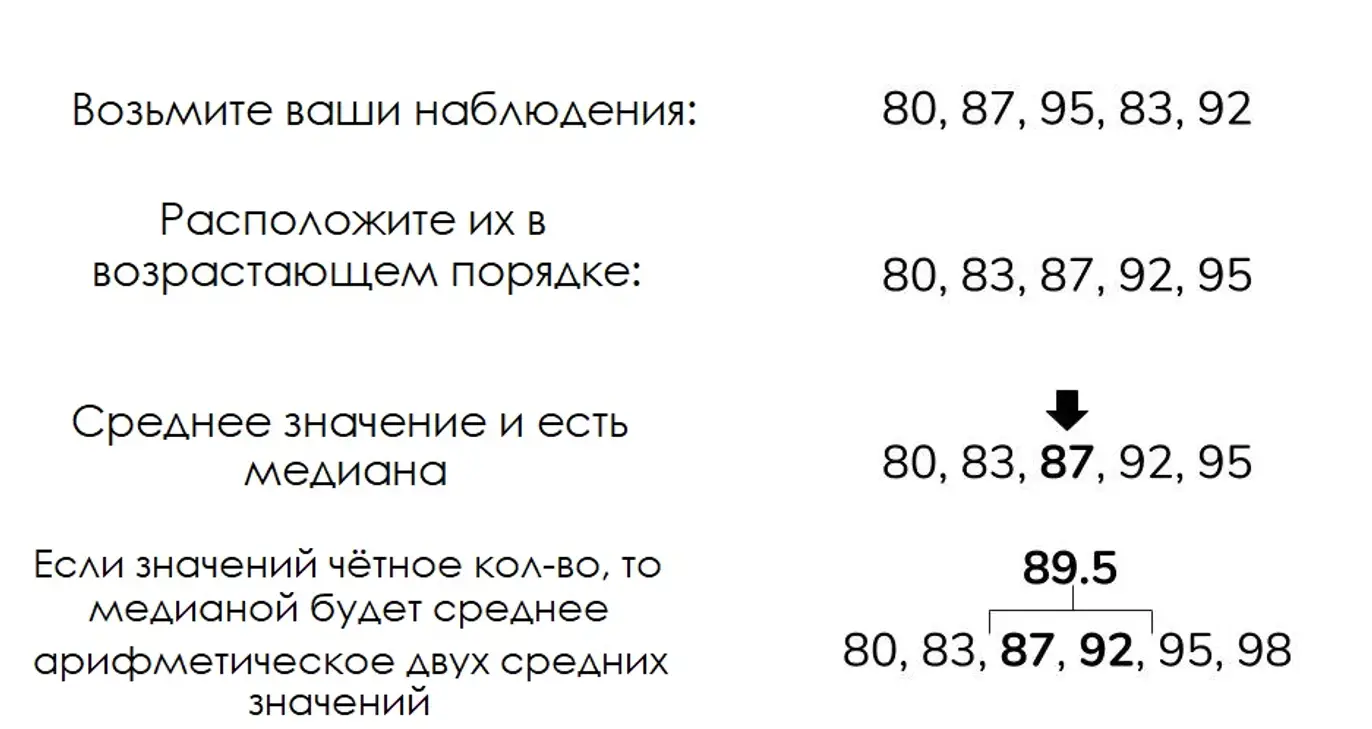

Попробуем найти медиану цен на вина:

In [55]:
# Извлекаем цены
prices = [float(w[5]) for w in wines[1:] if w[5] != ""]

# Находим их количество
num_wines = len(prices)

# Сортируем в порядке возрастания
sorted_prices = sorted(prices)

# Ищем индекс среднего элемента
middle = num_wines // 2

if num_wines % 2 == 0:
    median = (sorted_prices[middle - 1] + sorted_prices[middle]) / 2
else:
    median = sorted_prices[middle]

# Находим медиану
print(median)  # 24

24.0


С версии Python 3.4 есть [встроенный способ поиска медианного значения](https://docs.python.org/3.4/library/statistics.html#statistics.median).

Учитывая, что и медиана, и среднее значение отражают типичное значение, можно предположить, что они должны быть примерно одинаковы:

In [56]:
print(sum(prices)/len(prices))  # 33.13

33.13148249353299


Давайте взглянем на максимальную и минимальную цену в наших данных:

In [57]:
min_price = min(prices)
max_price = max(prices)
print(min_price, max_price)  # 4.0, 2300.0

4.0 2300.0


Мы можем вычислить моду сами, посчитав количество повторений различных цен и выбрав самую частую:

In [59]:
# Создаём пустой словарь, в котором будем считать количество появлений цен
price_counts = {}
for p in prices:
    if p not in price_counts:
        price_counts[p] = 1
    else:
        price_counts[p] += 1

# Проходимся по словарю и ищем максимальное количество повторений
maxp = 0
mode_price = None
for k, v in price_counts.items():
    if maxp < v:
        maxp = v
        mode_price = k
print(mode_price, maxp)  # 20.0, 7860

20.0 7860


На самом деле, с версии Python 3.4 можно найти и [моду](https://docs.python.org/3.4/library/statistics.html#statistics.mode).

Мы нашли максимальную и минимальную цены, когда искали медиану, поэтому сейчас можем использовать их:

In [60]:
price_range = max_price - min_price
print(price_range)  # 2296.0

2296.0


Отношение к среднему арифметическому хорошо видно при расчёте отклонения:

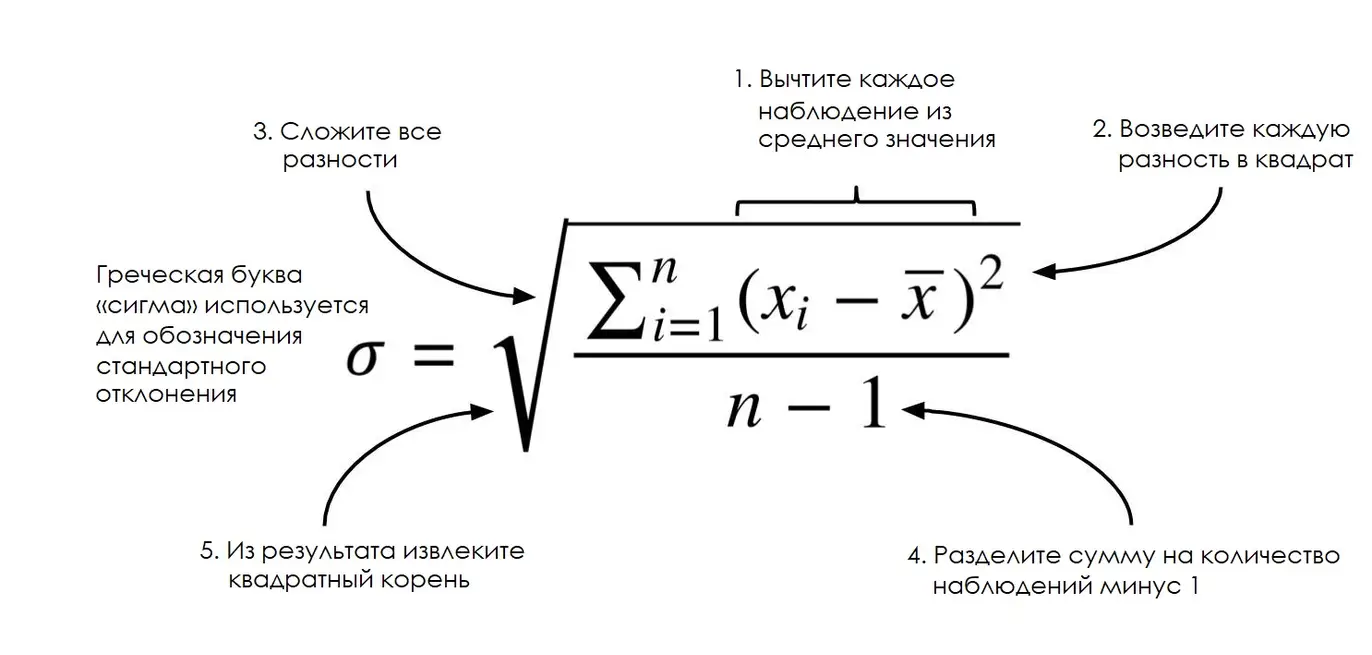

В некоторых источниках можно увидеть в качестве знаменателя `n` вместо `n-1`. Такие детали выходят за рамки нашего занятия, но знайте, что использование `n-1` считается более корректным. Можете прочитать [интуитивное объяснение коррекции Бесселя](https://math.stackexchange.com/questions/61251/intuitive-explanation-of-bessels-correction).

Поиск кумулятивной суммы вручную выглядел бы довольно громоздко, но циклы `for` в Python всё упрощают. Тем не менее в библиотеке `numpy` тоже реализовано вычисление стандартного отклонения через функцию `std`:

In [61]:
def stdev(nums):
    diffs = 0
    avg = sum(nums)/len(nums)
    for n in nums:
        diffs += (n - avg)**(2)
    return (diffs/(len(nums)-1))**(0.5)

print(stdev(scores))  # 3.2223917589832167

print(stdev(prices))  # 36.32240385925089

3.2223917589832167
36.32253619648552


Вот уравнение дисперсии:

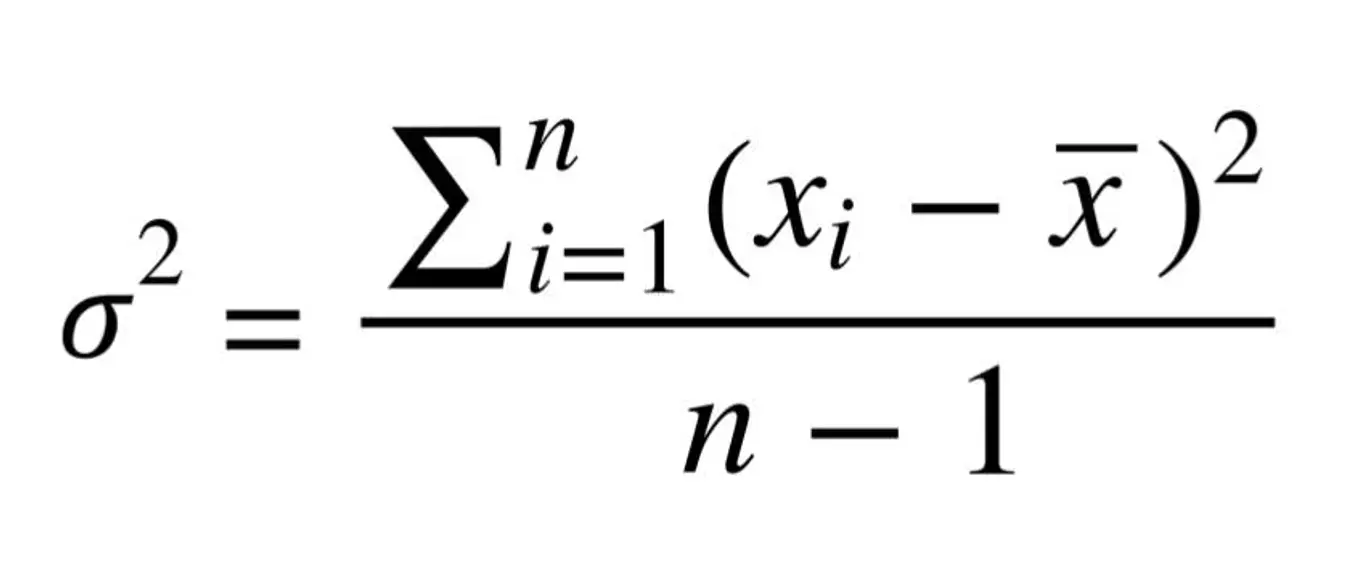

Ключевые идеи:

*   описательная статистика используется для систематизации и количественного описания данных;
*   среднее значение указывает на типичное значение в нашем наборе данных. Оно не робастно;
*   медиана является центральным значением в ряду данных. Она робастна;
*   мода — значение, которое появляется наиболее часто;
*   размах — это разность между максимальным и минимальным значениями в наборе данных;
*   дисперсия и стандартное отклонение являются средним расстоянием от среднего арифметического значения.

**Гистограммы и графики распределения**

Мы подробно рассмотрим применение гистограмм и графиков распределения в Python при помощи библиотек [matplotlib](https://matplotlib.org/) и [seaborn](https://seaborn.pydata.org/). На протяжении этой части занятия исследуем набор реальных данных, потому что [богатство доступных в сети материалов](https://github.com/awesomedata/awesome-public-datasets) не даёт права отказываться от них! Покажем данные [NYCflights13](https://www.openintro.org/data/index.php?data=nycflights) с более чем 300000 наблюдений за авиарейсами из Нью-Йорка в 2013 году. Данные по авиакомпаниям лежат [здесь](https://github.com/tidyverse/nycflights13/blob/main/data-raw/airlines.csv).

Считаем данные во фрейм данных pandas и отобразим первые 10 строк:

In [73]:
import pandas as pd

# Считайте данные и проверьте первые 10 строк.
flights = pd.read_csv('/content/nycflights.csv')
airlines = pd.read_csv('airlines.csv')

flights = flights.merge(airlines, how = 'left', on = 'carrier')
flights = flights[['arr_delay', 'name']]

flights = flights[flights['arr_delay'].between(-60, 120)]
flights.head(10)

,arr_delay,name
0,-4,Virgin America
1,10,Delta Air Lines Inc.
2,11,Delta Air Lines Inc.
3,-34,Delta Air Lines Inc.
4,-8,Endeavor Air Inc.
5,3,American Airlines Inc.
6,22,Southwest Airlines Co.
7,71,JetBlue Airways
8,-8,American Airlines Inc.
9,60,ExpressJet Airlines Inc.


Для этого графика мы используем бины длиной 5 минут, что означает, что количество бинов будет равно диапазону данных (от -60 до 120 минут), делённому на ширину бина, 5 минут (`bins = int(180/5)`).

<ipython-input-74-688ae5f8385c>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(flights['arr_delay'], hist=True, kde=False,


Text(0, 0.5, 'Flights')

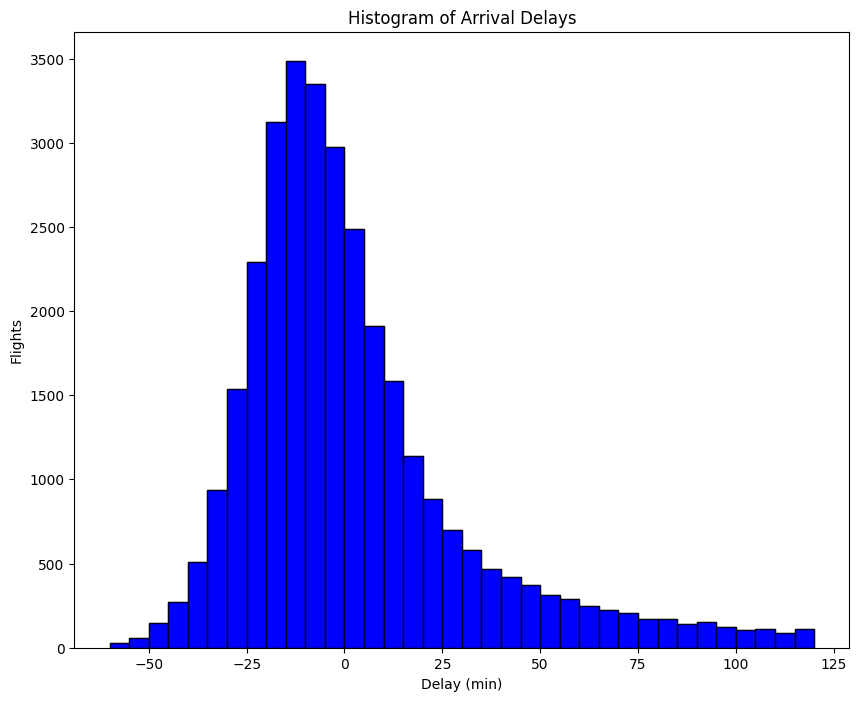

In [74]:
# Импортируйте библиотеки
import matplotlib.pyplot as plt
import seaborn as sns

# гистограмма matplotlib
plt.hist(flights['arr_delay'], color = 'blue', edgecolor = 'black',
         bins = int(180/5))

# гистограмма seaborn
sns.distplot(flights['arr_delay'], hist=True, kde=False,
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})
# Добавить метки
plt.title('Histogram of Arrival Delays')
plt.xlabel('Delay (min)')
plt.ylabel('Flights')

В нашем примере для создания разных распределений мы воспользуемся функцией seaborn `distplot`.

Мы выбрали bin = 5 минут, потому что предполагаем, что это значение лучше всего отражает распределение.

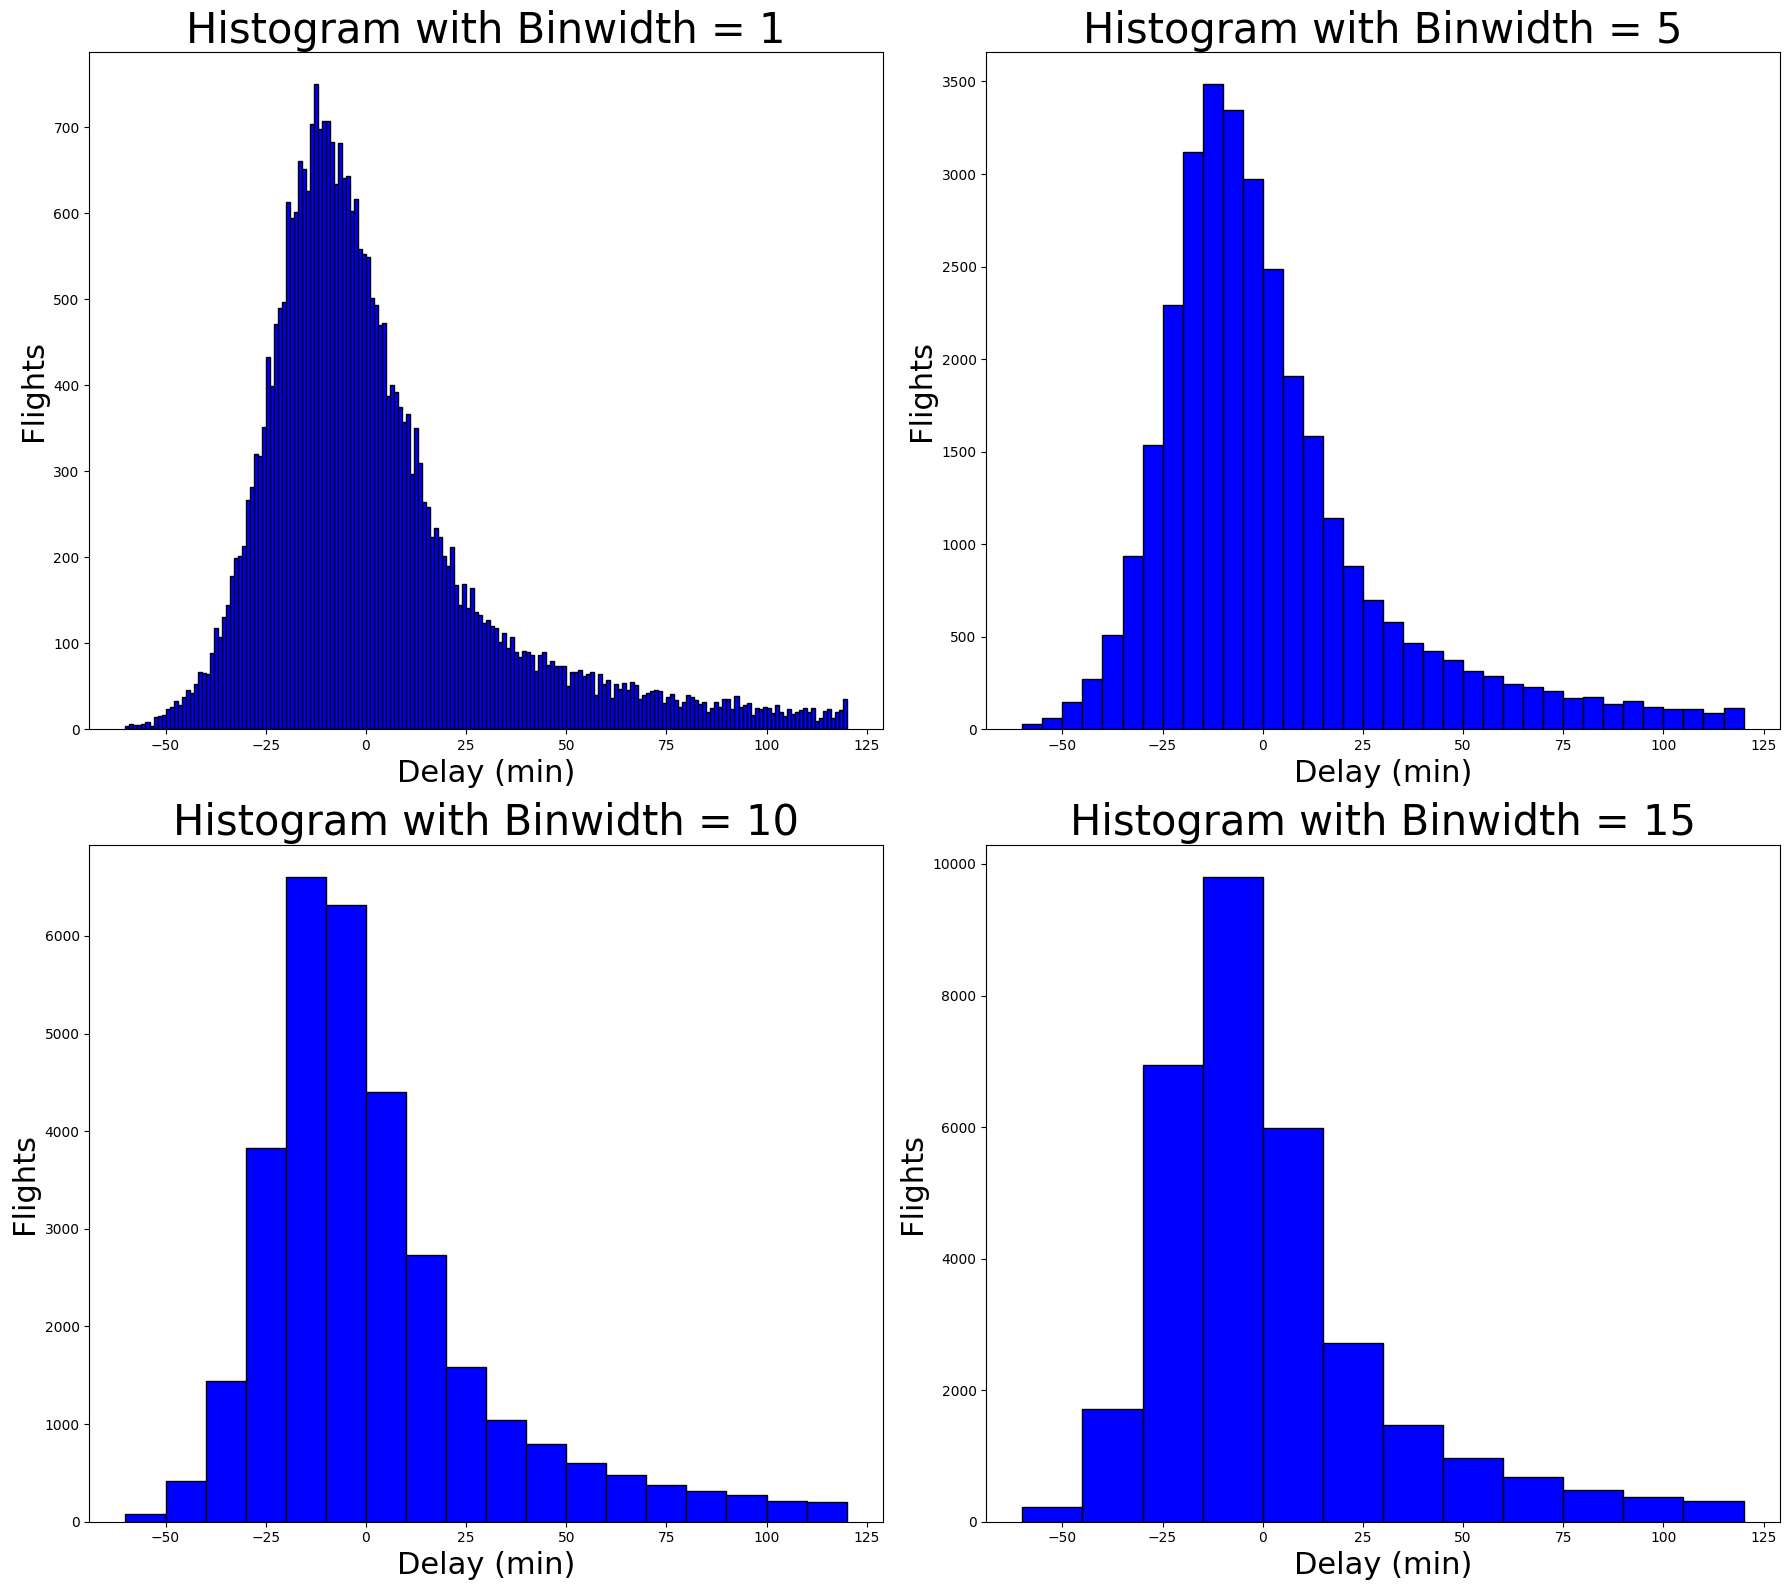

In [75]:
from IPython.core.pylabtools import figsize
figsize(18, 16)

# Показать 4 разных ширины бинов
for i, binwidth in enumerate([1, 5, 10, 15]):

    # Настройте график
    ax = plt.subplot(2, 2, i + 1)

    # Нарисуйте график
    ax.hist(flights['arr_delay'], bins = int(180/binwidth),
             color = 'blue', edgecolor = 'black')

    # Название и метки
    ax.set_title('Histogram with Binwidth = %d' % binwidth, size = 30)
    ax.set_xlabel('Delay (min)', size = 22)
    ax.set_ylabel('Flights', size= 22)

plt.tight_layout()
plt.show()

Если мы хотим сравнить распределения задержек прибытия рейсов разных авиалиний, построение гистограмм на одном графике плохо подходит для этой цели:

In [76]:
# Извлечь пять лучших авиакомпаний с наибольшим количеством рейсов
carrier_flights = pd.Series(flights.groupby('name')['name'].count())
carrier_flights = carrier_flights.sort_values(ascending=False)
top_five = carrier_flights.index[:5]

# Подмножество для 5 лучших авиакомпаний
top_five_flights = flights[flights['name'].isin(top_five)]

<ipython-input-77-f8c0c2d9331c>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(subset['arr_delay'], bins = int(180/5),


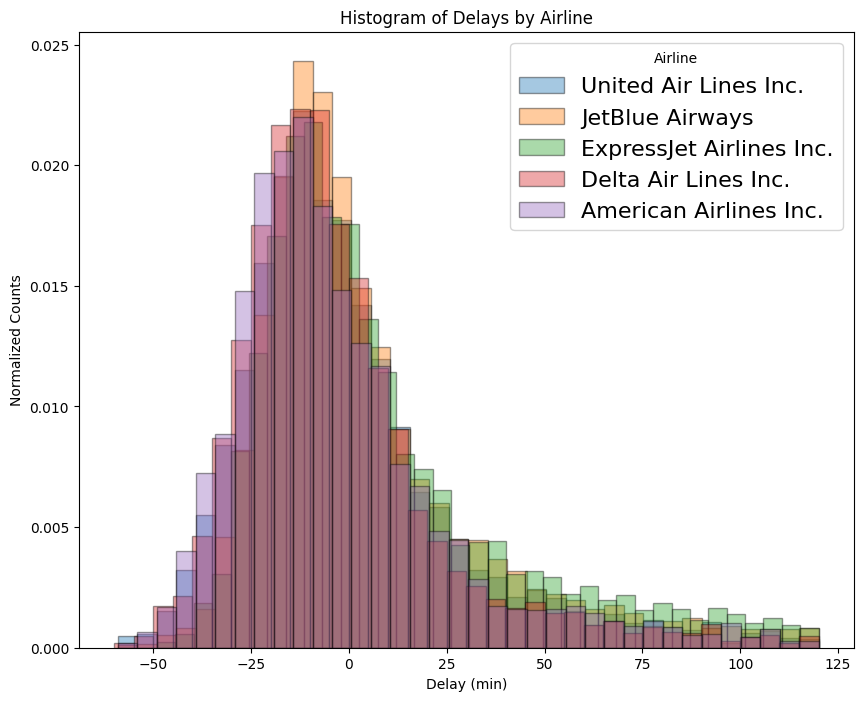

In [77]:
figsize(10, 8)

# Пройдитесь по каждой из пяти авиакомпаний
for airline in top_five:
    # Подмножество для авиакомпании
    subset = top_five_flights[top_five_flights['name'] == airline]
    # Составьте гистограмму с авиакомпанией
    sns.distplot(subset['arr_delay'], bins = int(180/5),
                 label = airline, hist = True, kde = False,
                 norm_hist=True,
                 hist_kws = {'edgecolor': 'black'})

plt.legend(prop={'size': 16}, title = 'Airline')
plt.title('Histogram of Delays by Airline'); plt.xlabel('Delay (min)'); plt.ylabel('Normalized Counts');

Для нормализации оси у с учётом различий в количестве рейсов разных авиалиний мы используем аргумент `norm_hist = True` при вызове функции `sns.distplot`.

Для расположения гистограмм рядом создадим списки (list) задержек рейсов по авиалиниям, а затем передадим вызываемой функции `plt.hist` список таких списков. Всё это, начиная с создания списков, делает вот такой код:

Text(0.5, 1.0, 'Side-by-Side Histogram with Multiple Airlines')

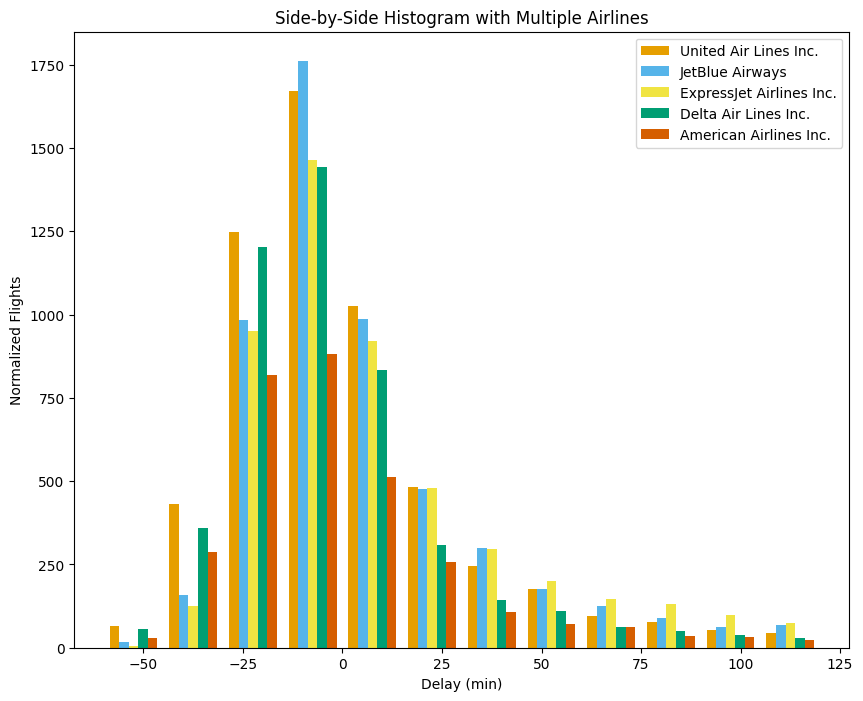

In [80]:
# Составьте отдельный список для каждой авиакомпании
x1 = list(flights[flights['name'] == 'United Air Lines Inc.']['arr_delay'])
x2 = list(flights[flights['name'] == 'JetBlue Airways']['arr_delay'])
x3 = list(flights[flights['name'] == 'ExpressJet Airlines Inc.']['arr_delay'])
x4 = list(flights[flights['name'] == 'Delta Air Lines Inc.']['arr_delay'])
x5 = list(flights[flights['name'] == 'American Airlines Inc.']['arr_delay'])

# Назначьте цвета для каждой авиакомпании и названия
colors = ['#E69F00', '#56B4E9', '#F0E442', '#009E73', '#D55E00']
names = ['United Air Lines Inc.', 'JetBlue Airways', 'ExpressJet Airlines Inc.',
         'Delta Air Lines Inc.', 'American Airlines Inc.']

# Создайте гистограмму, используя список списков
# Назначьте цвета и названия
plt.hist([x1, x2, x3, x4, x5], bins = int(180/15), color = colors, label=names)

# Форматирование графика
plt.legend()
plt.xlabel('Delay (min)')
plt.ylabel('Normalized Flights')
plt.title('Side-by-Side Histogram with Multiple Airlines')

Вместо построения столбцов данных рядом мы можем расположить их друг над другом при помощи параметра `stacked = True` при вызове гистограммы:

(array([[  65.,  430., 1249., 1672., 1025.,  481.,  246.,  175.,   94.,
           78.,   52.,   43.],
        [  81.,  588., 2233., 3433., 2013.,  956.,  545.,  350.,  220.,
          167.,  115.,  111.],
        [  86.,  714., 3184., 4897., 2933., 1434.,  841.,  551.,  367.,
          297.,  212.,  186.],
        [ 142., 1073., 4388., 6339., 3767., 1743.,  985.,  662.,  429.,
          346.,  251.,  214.],
        [ 171., 1359., 5208., 7222., 4279., 1999., 1092.,  733.,  491.,
          381.,  284.,  236.]]),
 array([-60., -45., -30., -15.,   0.,  15.,  30.,  45.,  60.,  75.,  90.,
        105., 120.]),
 <a list of 5 BarContainer objects>)

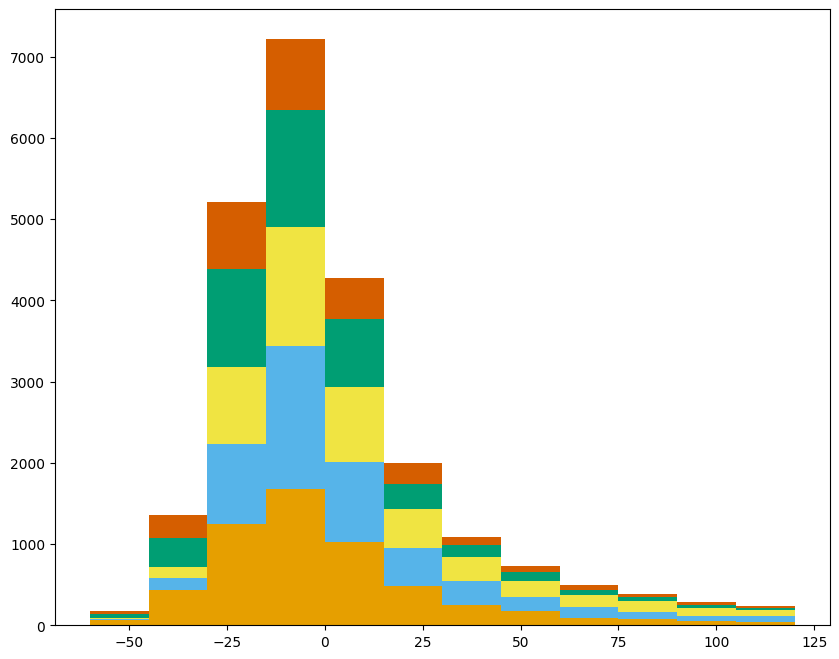

In [82]:
# Stacked histogram with multiple airlines
plt.hist([x1, x2, x3, x4, x5], bins = int(180/15), stacked=True, color = colors, label=names)

Самый распространённый вариант построения графика распределения — [ядерная оценка плотности](https://ru.wikipedia.org/wiki/%D0%AF%D0%B4%D0%B5%D1%80%D0%BD%D0%B0%D1%8F_%D0%BE%D1%86%D0%B5%D0%BD%D0%BA%D0%B0_%D0%BF%D0%BB%D0%BE%D1%82%D0%BD%D0%BE%D1%81%D1%82%D0%B8).

Если вы находите описание создание графика распределения немного запутанным, взгляните на следующий график:

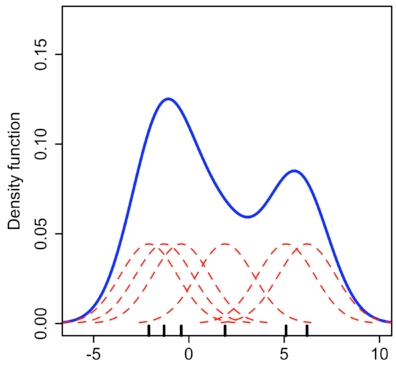

Ядерная оценка плотности ([Источник](https://en.wikipedia.org/wiki/Kernel_density_estimation))

[Что показывает ось y](https://stats.stackexchange.com/questions/48109/what-does-the-y-axis-in-a-kernel-density-plot-mean)? Нужно помнить, что это именно *плотность вероятности*, а не сама вероятность. Разница между ними заключается в том, что [плотность вероятности — это вероятность на единицу по оси x](https://stats.stackexchange.com/questions/4220/can-a-probability-distribution-value-exceeding-1-be-ok). Несколько смущает то, что поскольку это плотность вероятности, а не вероятность, [ось y может принимать значения больше единицы](https://stackoverflow.com/questions/42661973/r-density-plot-y-axis-larger-than-1).

При построении графиков распределения в seaborn можно использовать функцию `distplot` или `kdeplot`. Мы снова используем `distplot`, ведь он строит несколько распределений одним вызовом функции. Например, можно построить график распределения задержек всех рейсов поверх соответствующей гистограммы:

<ipython-input-83-555cb96933b6>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(flights['arr_delay'], hist=True, kde=True,


<Axes: xlabel='arr_delay', ylabel='Density'>

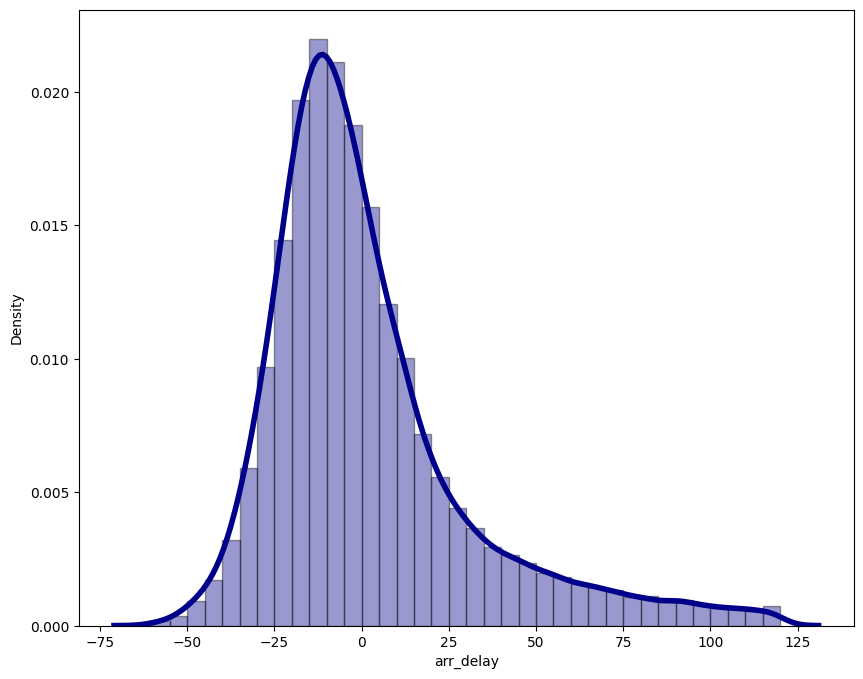

In [83]:
# График плотности и гистограмма всех задержек прибытия
sns.distplot(flights['arr_delay'], hist=True, kde=True,
             bins=int(180/5), color = 'darkblue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

Величину, аналогичную ширине бина в гистограмме, называют [шириной полосы пропускания (bandwidth)](https://ru.wikipedia.org/wiki/%D0%AF%D0%B4%D0%B5%D1%80%D0%BD%D0%B0%D1%8F_%D0%BE%D1%86%D0%B5%D0%BD%D0%BA%D0%B0_%D0%BF%D0%BB%D0%BE%D1%82%D0%BD%D0%BE%D1%81%D1%82%D0%B8#%D0%92%D1%8B%D0%B1%D0%BE%D1%80_%D0%BF%D0%BE%D0%BB%D0%BE%D1%81%D1%8B_%D0%BF%D1%80%D0%BE%D0%BF%D1%83%D1%81%D0%BA%D0%B0%D0%BD%D0%B8%D1%8F). Библиотека построения графиков (plotting library) позволяет выбрать ширину полосы пропускания (по умолчанию используется [«оценка по Скотту» (scott)](https://stats.stackexchange.com/questions/90656/kernel-bandwidth-scotts-vs-silvermans-rules)). Значение по умолчанию на этом графике, ‘scott’, действительно выглядит как наилучший вариант.

<ipython-input-86-8d28a96a086c>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(flights['arr_delay'], hist = False, kde = True,
/usr/local/lib/python3.11/dist-packages/seaborn/distributions.py:2496: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=scott`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
<ipython-input-86-8d28a96a086c>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code

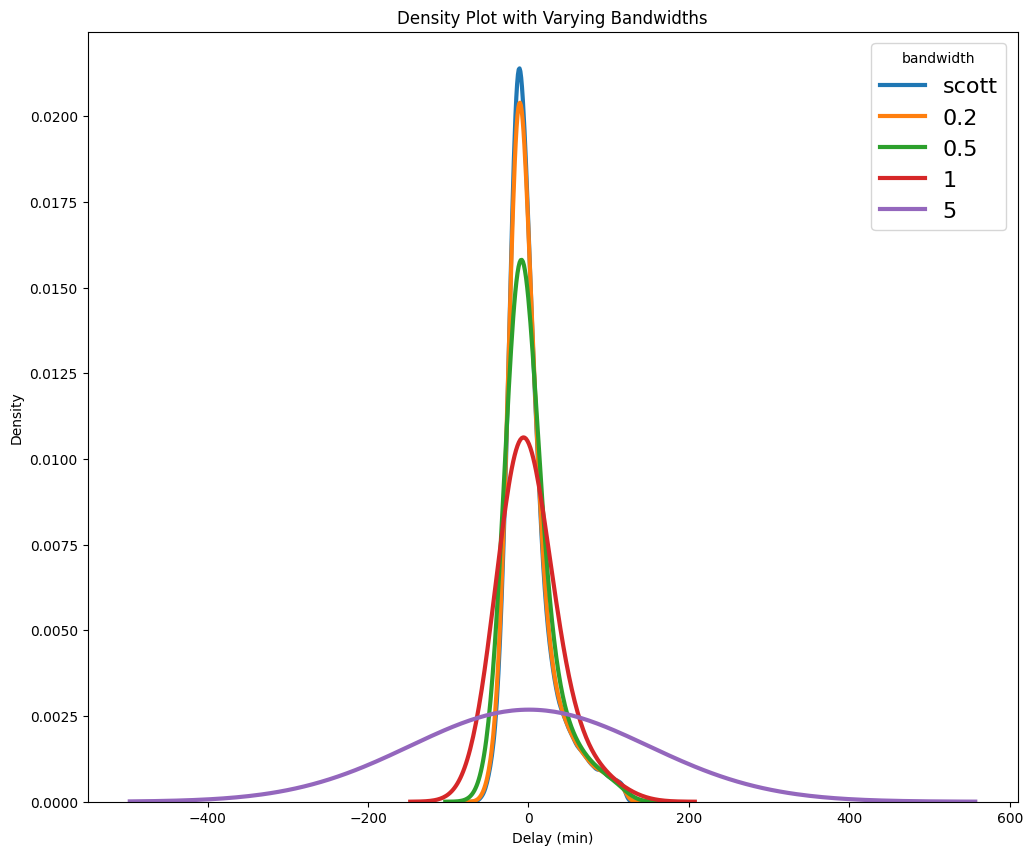

In [86]:
figsize(12, 10)

for bandwidth in ['scott', 0.2, 0.5, 1, 5]:
    sns.distplot(flights['arr_delay'], hist = False, kde = True,
                 kde_kws={'bw': bandwidth, 'linewidth': 3},
                 label = bandwidth)

plt.legend(prop={'size': 16}, title = 'bandwidth')
plt.title('Density Plot with Varying Bandwidths');
plt.xlabel('Delay (min)'); plt.ylabel('Density');

Чтобы показать распределения плотности на одном графике, мы можем перебрать все авиалинии, каждый раз вызывая `distplot`. Код для построения графика распределения для множества авиалиний приведён ниже:

<ipython-input-88-8bb4e30df354>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(subset['arr_delay'], hist = False, kde = True,
<ipython-input-88-8bb4e30df354>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(subset['arr_delay'], hist = False, kde = True,
<ipython-input-88-8b

Text(0, 0.5, 'Density')

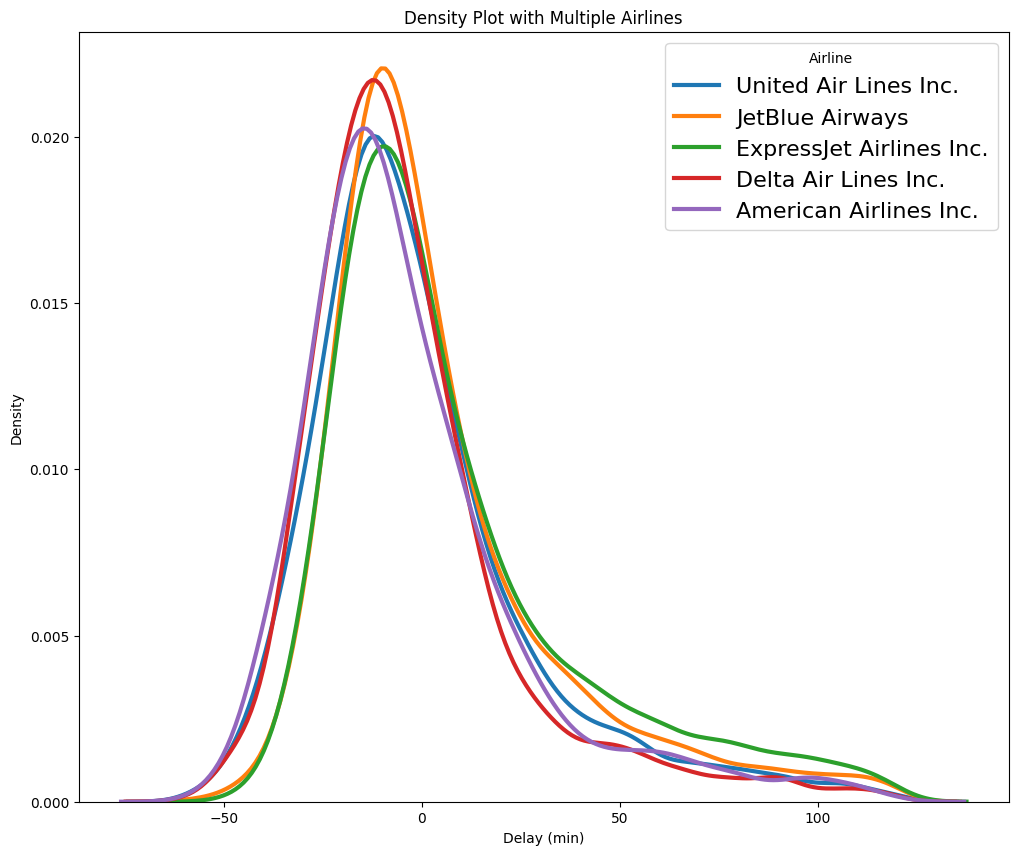

In [88]:
# Список пяти авиакомпаний для построения графика
airlines = ['United Air Lines Inc.', 'JetBlue Airways', 'ExpressJet Airlines Inc.',
         'Delta Air Lines Inc.', 'American Airlines Inc.']

# Повторите все пять авиакомпаний
for airline in airlines:
    # Подмножество для авиакомпании
    subset = flights[flights['name'] == airline]

    # Нарисуйте график плотности
    sns.distplot(subset['arr_delay'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = airline)

# Форматирование графика
plt.legend(prop={'size': 16}, title = 'Airline')
plt.title('Density Plot with Multiple Airlines')
plt.xlabel('Delay (min)')
plt.ylabel('Density')

Чтобы затенять графики плотности, мы передаём `shade = True` в аргументе `kde_kws` при вызове функции `distplot`.

<ipython-input-90-d6af30598223>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(subset['arr_delay'], hist = False, kde = True,
/usr/local/lib/python3.11/dist-packages/seaborn/distributions.py:2496: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
<ipython-input-90-d6af30598223>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) o

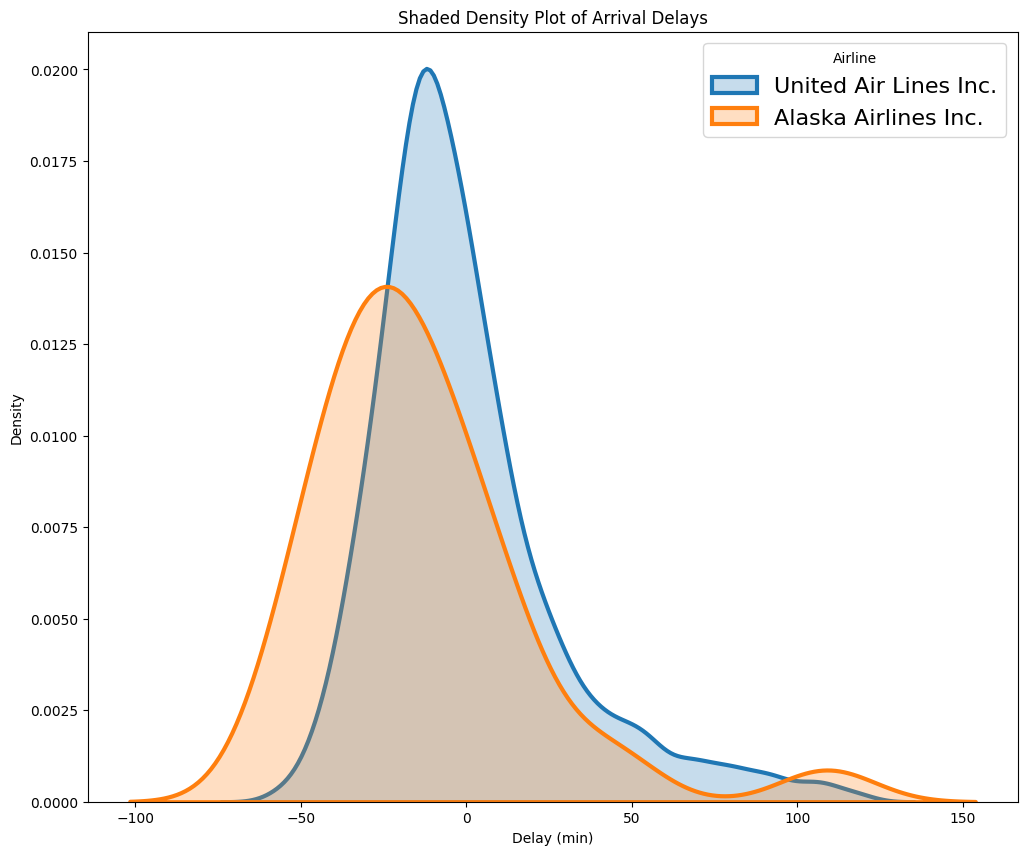

In [90]:
for airline in ['United Air Lines Inc.', 'Alaska Airlines Inc.']:
    subset = flights[flights['name'] == airline]

    sns.distplot(subset['arr_delay'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, label = airline)

plt.legend(prop={'size': 16}, title = 'Airline')
plt.title('Shaded Density Plot of Arrival Delays');
plt.xlabel('Delay (min)'); plt.ylabel('Density');

Преимущество использования `distplot` в seaborn — возможность добавления штрих-диаграммы при вызове `rug = True` с одним параметром (и небольшим форматированием).

<ipython-input-91-ca4b8cebe902>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(subset['arr_delay'], hist = False, kde = True, rug = True,


Text(0, 0.5, 'Density')

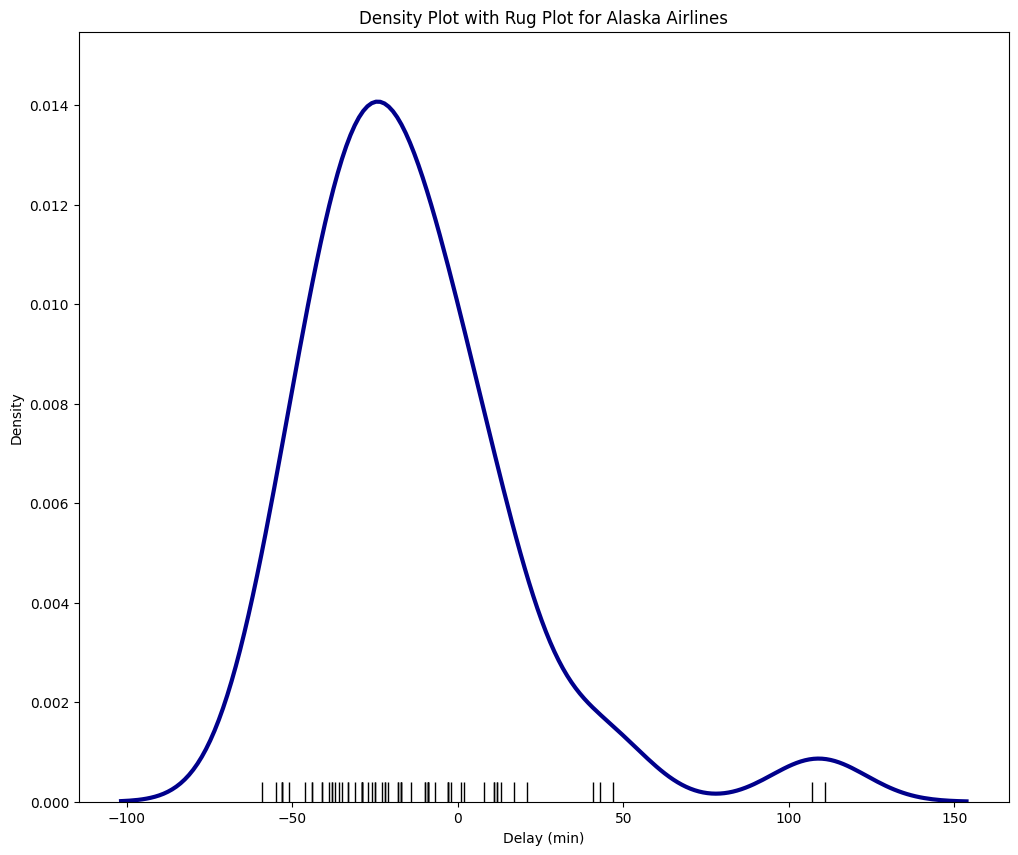

In [91]:
# Подмножество для Alaska Airlines
subset = flights[flights['name'] == 'Alaska Airlines Inc.']

# Плотность участка со штриховкой
sns.distplot(subset['arr_delay'], hist = False, kde = True, rug = True,
             color = 'darkblue',
             kde_kws={'linewidth': 3},
             rug_kws={'color': 'black'})

# Форматирование графика
plt.title('Density Plot with Rug Plot for Alaska Airlines')
plt.xlabel('Delay (min)')
plt.ylabel('Density')